In [1]:
import tracemalloc

from utils_v1 import *
import traceback


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADistanceMap, PAMultipleDates,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential
from src.trainer.multioutput import TrainerMCDropout, TrainerSingleRun
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric
import json
import pickle 
import src.trainer.evidential as evidential
from src.backend.Logger import Logger


In [3]:
site = 'PA'
mode = 'mcd'
training = False
inferring = True
print("Mode: {}. Site: {}. Training: {}".format(mode, site, training))


Mode: mcd. Site: PA. Training: False


In [4]:


#dates = [2018, 2019]

if site == 'PA':
	dates = [2017, 2018]

	dataset = PAMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)


	if mode == 'evidential':	
		#exp_id_base = 148
		# exp_id_base = 155
		exp_id_base = 194
		exp_id_base = 198
		exp_id_base = 214

		# earlier date
		exp_id_base = 224
	elif mode == 'mcd' or mode == 'single_run':
		exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121]

else:
	dates = [2018, 2019]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	
	if mode == 'evidential':	

		# MT
		# exp_id_base = 196
		# early date
		exp_id_base = 206
		# early date inference
		exp_id_base = 210
	elif mode == 'mcd' or mode == 'single_run':
		exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123]

ic(dates)


if issubclass(type(dataset), MultipleDates):
	if mode == 'evidential':
		patchesHandler = PatchesHandlerEvidential(
			dataset)
	else:
		patchesHandler = PatchesHandlerMultipleDates(
			dataset)
		
else:
	patchesHandler = PatchesHandler()



ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2017, 2018]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
config = {
    "training": training,
    "learning_rate": 1e-4,
    "weights": [0.1, 0.9, 0],
    "save_probabilities": False,
    "loadInference": False,
    "addPastDeforestationInput": True,
    "Uncertainty": {},
    "uncertainty_method": "",
    "evidence_function": evidential.relu_evidence
    }

if mode == 'evidential':
    config["inference_times"] = 1
    config['Uncertainty']['annealing_step'] = 10*375
    config['evidence_function'] = evidential.relu_evidence
    trainer_class = TrainerEvidential
    config['uncertainty_method'] = "evidential"
    config['classes_mode'] = None

    repetition_n = 10
    # repetition_n = 6

    experiment_values = np.ones(repetition_n).astype(np.uint8)


    # experiment_values = [int(x) for x in experiment_values]

    exp_ids = range(exp_id_base, exp_id_base+len(experiment_values))

if mode == 'mcd':
    config["inference_times"] = 10
    trainer_class = TrainerMCDropout
    config['uncertainty_method'] = "pred_entropy"
    config['classes_mode'] = False

elif mode == 'single_run':
    config["inference_times"] = 1
    trainer_class = TrainerSingleRun
    config['uncertainty_method'] = "per_entropy_single"
    config['classes_mode'] = False



In [6]:
exp_ids

[123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121]

In [7]:
if training == True:
    idx = 0
    error_count = 0

    while idx < len(exp_ids):
    # for experiment_value, exp_id in zip(experiment_values, exp_ids):
        try:

            print("Beginning run number {}".format(idx))
            logger = Logger()
            trainer = trainer_class(config, dataset, patchesHandler, logger)

            trainer.defineExperiment(exp_ids[idx])

            trainer.setExperimentPath()
            trainer.createLogFolders()

            trainer.loadDataset()

            # %%
            if config["training"] == True:
                trainer.run()
            idx += 1
            print("Grid execution idx: {}".format(idx))            
        except Exception as e: 
            print(traceback.format_exc())
            error_count += 1
            if error_count > 10:
                sys.exit()
            print("Execution error in idx {}. Retrying...".format(idx))
            continue


In [8]:

if site == 'PA':

	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	

else:

	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	


ic(dates)

if issubclass(type(dataset), MultipleDates):
	if mode == 'evidential':
		patchesHandler = PatchesHandlerEvidential(
			dataset)
	else:
		patchesHandler = PatchesHandlerMultipleDates(
			dataset)
		
else:
	patchesHandler = PatchesHandler()



ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


Beginning run number 0
D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp123/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161657761,   1458239], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161657761,   1458239], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161795484,   1320516], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162978277,    137723], dtype=int64))
ic| self.f1: 79.74, self.precision: 95.13, self.recall: 68.63
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9433705,)
ic| f1_val: 84.2
    precision_val: 88.52
    recall_val: 80.29
    mAP_val: 85.39


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162376652,    739348], dtype=int64))
[0. 1.]
K = 1, pred_mean shape (17760, 9216, 1)


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54173739,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54173739,) (54173739,)
0.6792476375987123
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.5292378768920899)


0.02474262809975081
0.20307793182207062
threshold 0.20307793182207062


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2070014,)
    predicted_test_classified_incorrect.shape: (2070014,)
ic| TP_H + FN_H + FP_H + TN_H: 2070014
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 2070014
    len(label_mask_current_deforestation_test): 54173739


[0.99413228 0.89506532 0.41580023 0.03821065 0.89213582 0.50525172
 0.10436467]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (1161997,)
    predicted_test_classified_incorrect.shape: (1161997,)
ic| TP_H + FN_H + FP_H + TN_H: 1161997
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1161997
    len(label_mask_current_deforestation_test): 54173739


[0.98581674 0.86443491 0.52218048 0.02144945 0.85584099 0.41461556
 0.15613735]
0.12608201324794868
threshold 0.12608201324794868


ic| label_current_deforestation_test_classified_incorrect.shape: (3126496,)
    predicted_test_classified_incorrect.shape: (3126496,)
ic| TP_H + FN_H + FP_H + TN_H: 3126496
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 3126496
    len(label_mask_current_deforestation_test): 54173739


[0.99723875 0.9139373  0.3317689  0.05771239 0.91192426 0.55663357
 0.07429846]
0.2642948432832253
threshold 0.2642948432832253


ic| label_current_deforestation_test_classified_incorrect.shape: (1550045,)
    predicted_test_classified_incorrect.shape: (1550045,)
ic| TP_H + FN_H + FP_H + TN_H: 1550045
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1550045
    len(label_mask_current_deforestation_test): 54173739


[0.99164243 0.88016478 0.47146755 0.02861248 0.87324191 0.46274336
 0.12962033]
0.26461194266562993
threshold 0.26461194266562993


ic| label_current_deforestation_test_classified_incorrect.shape: (1547732,)
    predicted_test_classified_incorrect.shape: (1547732,)
ic| TP_H + FN_H + FP_H + TN_H: 1547732
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1547732
    len(label_mask_current_deforestation_test): 54173739


[0.9916279  0.88009773 0.47176384 0.02856978 0.87312274 0.46248123
 0.12976057]
0.24762050855699988
threshold 0.24762050855699988


ic| label_current_deforestation_test_classified_incorrect.shape: (1673695,)
    predicted_test_classified_incorrect.shape: (1673695,)
ic| TP_H + FN_H + FP_H + TN_H: 1673695
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1673695
    len(label_mask_current_deforestation_test): 54173739


[0.99239319 0.88420169 0.4573214  0.03089495 0.8785526  0.47436576
 0.12261799]
0.2306067581907572
threshold 0.2306067581907572


ic| label_current_deforestation_test_classified_incorrect.shape: (1812786,)
    predicted_test_classified_incorrect.shape: (1812786,)
ic| TP_H + FN_H + FP_H + TN_H: 1812786
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1812786
    len(label_mask_current_deforestation_test): 54173739


[0.99310684 0.8884158  0.44207262 0.03346245 0.88386449 0.48619485
 0.11557766]
0.2535698827672885
threshold 0.2535698827672885


ic| label_current_deforestation_test_classified_incorrect.shape: (1628296,)
    predicted_test_classified_incorrect.shape: (1628296,)
ic| TP_H + FN_H + FP_H + TN_H: 1628296
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1628296
    len(label_mask_current_deforestation_test): 54173739


[0.99216412 0.882705   0.46252204 0.03005692 0.87658632 0.47018565
 0.12508948]
0.2550280355145211
threshold 0.2550280355145211


ic| label_current_deforestation_test_classified_incorrect.shape: (1617255,)
    predicted_test_classified_incorrect.shape: (1617255,)
ic| TP_H + FN_H + FP_H + TN_H: 1617255
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1617255
    len(label_mask_current_deforestation_test): 54173739


[0.99210957 0.88236839 0.46372208 0.02985312 0.87612481 0.46920223
 0.1257214 ]
0.2531708768215161
threshold 0.2531708768215161


ic| label_current_deforestation_test_classified_incorrect.shape: (1631251,)
    predicted_test_classified_incorrect.shape: (1631251,)
ic| TP_H + FN_H + FP_H + TN_H: 1631251
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1631251
    len(label_mask_current_deforestation_test): 54173739


[0.99217604 0.88280455 0.46220275 0.03011147 0.87671262 0.47044057
 0.12492363]
0.2540102147590986
threshold 0.2540102147590986


ic| label_current_deforestation_test_classified_incorrect.shape: (1624951,)
    predicted_test_classified_incorrect.shape: (1624951,)
ic| TP_H + FN_H + FP_H + TN_H: 1624951
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1624951
    len(label_mask_current_deforestation_test): 54173739


[0.99214683 0.88259225 0.46286297 0.02999518 0.87645851 0.46991684
 0.12527836]
0.2543989876932149
threshold 0.2543989876932149


ic| label_current_deforestation_test_classified_incorrect.shape: (1621995,)
    predicted_test_classified_incorrect.shape: (1621995,)
ic| TP_H + FN_H + FP_H + TN_H: 1621995
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1621995
    len(label_mask_current_deforestation_test): 54173739


[0.99213226 0.88252277 0.46319308 0.02994061 0.87633095 0.46963286
 0.12545292]
0.2539768776581849
threshold 0.2539768776581849


ic| label_current_deforestation_test_classified_incorrect.shape: (1625230,)
    predicted_test_classified_incorrect.shape: (1625230,)
ic| TP_H + FN_H + FP_H + TN_H: 1625230
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1625230
    len(label_mask_current_deforestation_test): 54173739


[0.99215225 0.88260593 0.46284268 0.03000033 0.87645904 0.46992877
 0.1252642 ]
0.25388519905933427
threshold 0.25388519905933427


ic| label_current_deforestation_test_classified_incorrect.shape: (1625905,)
    predicted_test_classified_incorrect.shape: (1625905,)
ic| TP_H + FN_H + FP_H + TN_H: 1625905
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1625905
    len(label_mask_current_deforestation_test): 54173739


[0.99215373 0.88263983 0.46276015 0.03001279 0.87649436 0.46998999
 0.12522983]
0.2539418595494649
threshold 0.2539418595494649


ic| label_current_deforestation_test_classified_incorrect.shape: (1625495,)
    predicted_test_classified_incorrect.shape: (1625495,)
ic| TP_H + FN_H + FP_H + TN_H: 1625495
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1625495
    len(label_mask_current_deforestation_test): 54173739
ic| self.threshold_optimal: 0.2539768776581849


[0.99215174 0.88262431 0.46281291 0.03000522 0.87647346 0.46994724
 0.12525176]
threshold 0.2539768776581849


ic| label_current_deforestation_test_classified_incorrect.shape: (1625230,)
    predicted_test_classified_incorrect.shape: (1625230,)
ic| TP_H + FN_H + FP_H + TN_H: 1625230
    len(label_mask_current_deforestation_test): 54173739
ic| TP_H + FN_H + FP_H + TN_H: 1625230
    len(label_mask_current_deforestation_test): 54173739


[0.99215225 0.88260593 0.46284268 0.03000033 0.87645904 0.46992877
 0.1252642 ]
threshold 0.2539768776581849
(54173739,) (54173739,)


ic| self.m_optimal: {'AA': array([0.03000033]),
                     'UEO': array([0.1252642]),
                     'f1': 79.74,
                     'f1_H': array([0.61181974]),
                     'f1_L': array([0.93417857]),
                     'precision_H': array([0.87645904]),
                     'precision_L': array([0.99215225]),
                     'recall_H': array([0.46992877]),
                     'recall_L': array([0.88260593]),
                     'recall_Ltotal': array([0.46284268])}
ic| self.m_audited_optimal: {'f1': array([0.96641623]),
                             'precision': array([0.99611399]),
                             'recall': array([0.938438])}


cm_audited [[53431892     2706]
 [   45503   693638]]
[0.99611399 0.938438  ]
Result idx 0: {'other_uncertainty_metrics': {'sUEO': 0.6792476375987123, 'ece_score': 0.02474262809975081}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[3.1325812e-03],
       [4.3137840e-07],
       [6.3952531e-05],
       [8.5875578e-03],
       [9.5199546e-05],
       [1.0005843e-06],
       [1.0722359e-04],
       [1.1822790e-03],
       [2.4638954e-04],
       [1.3750782e-03]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.3048713 ],
       [0.03969803],
       [0.35252574],
       [0.3930571 ],
       [0.1799356 ],
       [0.2495324 ],
       [0.27107358],
       [0.2907197 ],
       [0.13493493],
       [0.39063418]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.13086891],
       [0.00229446],
       [0.1563596 ],
       [0.29842225],
       [0.027

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp124/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161460205,   1655795], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161460205,   1655795], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161629204,   1486796], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162947001,    168999], dtype=int64))
ic| self.f1: 81.38, self.precision: 91.68, self.recall: 73.16
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9428549,)
ic| f1_val: 82.64
    precision_val: 83.59
    recall_val: 81.7
    mAP_val: 82.39


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162414386,    701614], dtype=int64))
[0. 1.]
K = 1, pred_mean shape (17760, 9216, 1)


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54165138,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54165138,) (54165138,)
0.7225641932787457
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.5292378768920899)


0.015045479687261566
0.20307793182207062
threshold 0.20307793182207062


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1788846,)
    predicted_test_classified_incorrect.shape: (1788846,)
ic| TP_H + FN_H + FP_H + TN_H: 1788846
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1788846
    len(label_mask_current_deforestation_test): 54165138


[0.97192865 0.91026744 0.5023682  0.03302578 0.81544761 0.51152803
 0.10902957]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (1074189,)
    predicted_test_classified_incorrect.shape: (1074189,)
ic| TP_H + FN_H + FP_H + TN_H: 1074189
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1074189
    len(label_mask_current_deforestation_test): 54165138


[0.95735615 0.88869426 0.60383565 0.01983174 0.76387721 0.39856033
 0.14933817]
0.12608201324794868
threshold 0.12608201324794868


ic| label_current_deforestation_test_classified_incorrect.shape: (2551354,)
    predicted_test_classified_incorrect.shape: (2551354,)
ic| TP_H + FN_H + FP_H + TN_H: 2551354
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 2551354
    len(label_mask_current_deforestation_test): 54165138


[0.98582535 0.92525851 0.42187373 0.04710325 0.83698652 0.56927892
 0.08440835]
0.24130892103022794
threshold 0.24130892103022794


ic| label_current_deforestation_test_classified_incorrect.shape: (1523091,)
    predicted_test_classified_incorrect.shape: (1523091,)
ic| TP_H + FN_H + FP_H + TN_H: 1523091
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1523091
    len(label_mask_current_deforestation_test): 54165138


[0.96789802 0.90366946 0.53648056 0.0281194  0.8006027  0.48017029
 0.12169732]
0.2370101362745878
threshold 0.2370101362745878


ic| label_current_deforestation_test_classified_incorrect.shape: (1550502,)
    predicted_test_classified_incorrect.shape: (1550502,)
ic| TP_H + FN_H + FP_H + TN_H: 1550502
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1550502
    len(label_mask_current_deforestation_test): 54165138


[0.96840304 0.9045156  0.53286267 0.02862546 0.80219912 0.48365213
 0.12031356]
0.2256347674411476
threshold 0.2256347674411476


ic| label_current_deforestation_test_classified_incorrect.shape: (1625800,)
    predicted_test_classified_incorrect.shape: (1625800,)
ic| TP_H + FN_H + FP_H + TN_H: 1625800
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1625800
    len(label_mask_current_deforestation_test): 54165138


[0.96955754 0.9065561  0.52297465 0.03001562 0.80676713 0.49303811
 0.1165486 ]
0.2170188229133045
threshold 0.2170188229133045


ic| label_current_deforestation_test_classified_incorrect.shape: (1686099,)
    predicted_test_classified_incorrect.shape: (1686099,)
ic| TP_H + FN_H + FP_H + TN_H: 1686099
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1686099
    len(label_mask_current_deforestation_test): 54165138


[0.97048206 0.90797299 0.51518975 0.03112886 0.81013165 0.50023605
 0.11366112]
0.2265204906445847
threshold 0.2265204906445847


ic| label_current_deforestation_test_classified_incorrect.shape: (1619860,)
    predicted_test_classified_incorrect.shape: (1619860,)
ic| TP_H + FN_H + FP_H + TN_H: 1619860
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1619860
    len(label_mask_current_deforestation_test): 54165138


[0.96947285 0.90639944 0.52371176 0.02990595 0.80643469 0.49235835
 0.1168411 ]
0.22414570755819727
threshold 0.22414570755819727


ic| label_current_deforestation_test_classified_incorrect.shape: (1635902,)
    predicted_test_classified_incorrect.shape: (1635902,)
ic| TP_H + FN_H + FP_H + TN_H: 1635902
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1635902
    len(label_mask_current_deforestation_test): 54165138


[0.96974763 0.90677872 0.52168168 0.03020212 0.80727479 0.49426283
 0.11605669]
0.22558583854317815
threshold 0.22558583854317815


ic| label_current_deforestation_test_classified_incorrect.shape: (1626095,)
    predicted_test_classified_incorrect.shape: (1626095,)
ic| TP_H + FN_H + FP_H + TN_H: 1626095
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1626095
    len(label_mask_current_deforestation_test): 54165138


[0.96956331 0.90657723 0.5229476  0.03002106 0.80677468 0.4930516
 0.11653809]
0.22587057439548733
threshold 0.22587057439548733


ic| label_current_deforestation_test_classified_incorrect.shape: (1624262,)
    predicted_test_classified_incorrect.shape: (1624262,)
ic| TP_H + FN_H + FP_H + TN_H: 1624262
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1624262
    len(label_mask_current_deforestation_test): 54165138


[0.96954264 0.90652206 0.52318429 0.02998722 0.80665679 0.49283724
 0.11662689]
0.22611882031280167
threshold 0.22611882031280167


ic| label_current_deforestation_test_classified_incorrect.shape: (1622549,)
    predicted_test_classified_incorrect.shape: (1622549,)
ic| TP_H + FN_H + FP_H + TN_H: 1622549
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1622549
    len(label_mask_current_deforestation_test): 54165138


[0.96951575 0.9064715  0.52339663 0.0299556  0.80656537 0.49264551
 0.11670884]
0.22576993026173067
threshold 0.22576993026173067


ic| label_current_deforestation_test_classified_incorrect.shape: (1624921,)
    predicted_test_classified_incorrect.shape: (1624921,)
ic| TP_H + FN_H + FP_H + TN_H: 1624921
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1624921
    len(label_mask_current_deforestation_test): 54165138


[0.96954588 0.90654232 0.52311261 0.02999939 0.80669775 0.49289956
 0.11659304]
0.22573659357968812
threshold 0.22573659357968812


ic| label_current_deforestation_test_classified_incorrect.shape: (1625127,)
    predicted_test_classified_incorrect.shape: (1625127,)
ic| TP_H + FN_H + FP_H + TN_H: 1625127
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1625127
    len(label_mask_current_deforestation_test): 54165138


[0.96955134 0.90654981 0.52308015 0.03000319 0.80670937 0.49292902
 0.11658471]
0.22580326694377323
threshold 0.22580326694377323


ic| label_current_deforestation_test_classified_incorrect.shape: (1624701,)
    predicted_test_classified_incorrect.shape: (1624701,)
ic| TP_H + FN_H + FP_H + TN_H: 1624701
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1624701
    len(label_mask_current_deforestation_test): 54165138
ic| self.threshold_optimal: 0.22576993026173067


[0.9695424  0.90654201 0.52313695 0.02999533 0.80668799 0.49287352
 0.11660567]
threshold 0.22576993026173067


ic| label_current_deforestation_test_classified_incorrect.shape: (1624921,)
    predicted_test_classified_incorrect.shape: (1624921,)
ic| TP_H + FN_H + FP_H + TN_H: 1624921
    len(label_mask_current_deforestation_test): 54165138
ic| TP_H + FN_H + FP_H + TN_H: 1624921
    len(label_mask_current_deforestation_test): 54165138


[0.96954588 0.90654232 0.52311261 0.02999939 0.80669775 0.49289956
 0.11659304]
threshold 0.22576993026173067
(54165138,) (54165138,)


ic| self.m_optimal: {'AA': array([0.02999939]),
                     'UEO': array([0.11659304]),
                     'f1': 81.38,
                     'f1_H': array([0.61191411]),
                     'f1_L': array([0.9369862]),
                     'precision_H': array([0.80669775]),
                     'precision_L': array([0.96954588]),
                     'recall_H': array([0.49289956]),
                     'recall_L': array([0.90654232]),
                     'recall_Ltotal': array([0.52311261])}
ic| self.m_audited_optimal: {'f1': array([0.96414766]),
                             'precision': array([0.98292853]),
                             'recall': array([0.94607103])}


cm_audited [[53413609    12149]
 [   39874   699506]]
[0.98292853 0.94607103]
Result idx 1: {'other_uncertainty_metrics': {'sUEO': 0.7225641932787457, 'ece_score': 0.015045479687261566}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[3.98992503e-04],
       [4.77042477e-07],
       [1.23579184e-05],
       [7.38300423e-06],
       [4.48541447e-11],
       [5.74317527e-09],
       [1.07646185e-08],
       [4.76661732e-08],
       [7.72854321e-07],
       [9.40881932e-08]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.4178429 ],
       [0.27156708],
       [0.30774346],
       [0.03069117],
       [0.5855377 ],
       [0.34596005],
       [0.2539056 ],
       [0.04457527],
       [0.45420286],
       [0.4120371 ]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.24020179],
       [0.04747793],
       [0.1210141 ],
       [0.00404109],
  

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp125/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161683657,   1432343], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161683657,   1432343], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161869042,   1246958], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162930615,    185385], dtype=int64))
ic| self.f1: 78.61, self.precision: 95.54, self.recall: 66.78
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9431360,)
ic| f1_val: 75.91
    precision_val: 88.66
    recall_val: 66.36
    mAP_val: 84.22


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162342074,    773926], dtype=int64))
[0. 1.]
K = 1, pred_mean shape (17760, 9216, 1)


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54152706,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54152706,) (54152706,)
0.7247701320854562
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.5292378768920899)


0.010928968421254523
0.20307793182207062
threshold 0.20307793182207062


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1437661,)
    predicted_test_classified_incorrect.shape: (1437661,)
ic| TP_H + FN_H + FP_H + TN_H: 1437661
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1437661
    len(label_mask_current_deforestation_test): 54152706


[0.9959832  0.84682094 0.41922308 0.02654828 0.89405448 0.4923294
 0.14112466]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (868373,)
    predicted_test_classified_incorrect.shape: (868373,)
ic| TP_H + FN_H + FP_H + TN_H: 868373
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 868373
    len(label_mask_current_deforestation_test): 54152706


[0.984912   0.82655337 0.52963785 0.01603563 0.85711405 0.38467776
 0.18837411]
0.12608201324794868
threshold 0.12608201324794868


ic| label_current_deforestation_test_classified_incorrect.shape: (2048755,)
    predicted_test_classified_incorrect.shape: (2048755,)
ic| TP_H + FN_H + FP_H + TN_H: 2048755
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 2048755
    len(label_mask_current_deforestation_test): 54152706


[0.99944744 0.85658919 0.33325611 0.03783292 0.9152864  0.54761636
 0.10854539]
0.2051721203189582
threshold 0.2051721203189582


ic| label_current_deforestation_test_classified_incorrect.shape: (1424899,)
    predicted_test_classified_incorrect.shape: (1424899,)
ic| TP_H + FN_H + FP_H + TN_H: 1424899
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1424899
    len(label_mask_current_deforestation_test): 54152706


[0.99584342 0.84648426 0.4212972  0.02631261 0.89347756 0.49079478
 0.14197539]
0.17786042796822887
threshold 0.17786042796822887


ic| label_current_deforestation_test_classified_incorrect.shape: (1603741,)
    predicted_test_classified_incorrect.shape: (1603741,)
ic| TP_H + FN_H + FP_H + TN_H: 1603741
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1603741
    len(label_mask_current_deforestation_test): 54152706


[0.99776051 0.84955814 0.39293146 0.02961516 0.90081287 0.51143687
 0.13056054]
0.15808283342866972
threshold 0.15808283342866972


ic| label_current_deforestation_test_classified_incorrect.shape: (1755323,)
    predicted_test_classified_incorrect.shape: (1755323,)
ic| TP_H + FN_H + FP_H + TN_H: 1755323
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1755323
    len(label_mask_current_deforestation_test): 54152706


[0.99876663 0.85193774 0.3708057  0.03241432 0.90634405 0.52592554
 0.12215913]
0.17826714088756737
threshold 0.17826714088756737


ic| label_current_deforestation_test_classified_incorrect.shape: (1600869,)
    predicted_test_classified_incorrect.shape: (1600869,)
ic| TP_H + FN_H + FP_H + TN_H: 1600869
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1600869
    len(label_mask_current_deforestation_test): 54152706


[0.99774917 0.84951022 0.39335008 0.02956212 0.90069264 0.51115148
 0.13073404]
0.1724160126509917
threshold 0.1724160126509917


ic| label_current_deforestation_test_classified_incorrect.shape: (1643910,)
    predicted_test_classified_incorrect.shape: (1643910,)
ic| TP_H + FN_H + FP_H + TN_H: 1643910
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1643910
    len(label_mask_current_deforestation_test): 54152706


[0.99814465 0.85022813 0.38700985 0.03035693 0.90222946 0.51542572
 0.12823917]
0.1669412253549085
threshold 0.1669412253549085


ic| label_current_deforestation_test_classified_incorrect.shape: (1685066,)
    predicted_test_classified_incorrect.shape: (1685066,)
ic| TP_H + FN_H + FP_H + TN_H: 1685066
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1685066
    len(label_mask_current_deforestation_test): 54152706


[0.99840527 0.85083251 0.38082542 0.03111693 0.90381801 0.51953737
 0.1259259 ]
0.1750185056700212
threshold 0.1750185056700212


ic| label_current_deforestation_test_classified_incorrect.shape: (1624750,)
    predicted_test_classified_incorrect.shape: (1624750,)
ic| TP_H + FN_H + FP_H + TN_H: 1624750
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1624750
    len(label_mask_current_deforestation_test): 54152706


[0.99794678 0.84996972 0.38981012 0.03000312 0.90158338 0.51352163
 0.12934967]
0.17508658834967328
threshold 0.17508658834967328


ic| label_current_deforestation_test_classified_incorrect.shape: (1624254,)
    predicted_test_classified_incorrect.shape: (1624254,)
ic| TP_H + FN_H + FP_H + TN_H: 1624254
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1624254
    len(label_mask_current_deforestation_test): 54152706


[0.99794714 0.84995422 0.38987786 0.02999396 0.90156176 0.51348003
 0.12937785]
0.1747319627936852
threshold 0.1747319627936852


ic| label_current_deforestation_test_classified_incorrect.shape: (1626806,)
    predicted_test_classified_incorrect.shape: (1626806,)
ic| TP_H + FN_H + FP_H + TN_H: 1626806
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1626806
    len(label_mask_current_deforestation_test): 54152706


[0.99796249 0.84998758 0.38950395 0.03004108 0.90166122 0.51373621
 0.12922619]
0.1749851697407439
threshold 0.1749851697407439


ic| label_current_deforestation_test_classified_incorrect.shape: (1624991,)
    predicted_test_classified_incorrect.shape: (1624991,)
ic| TP_H + FN_H + FP_H + TN_H: 1624991
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1624991
    len(label_mask_current_deforestation_test): 54152706


[0.99795351 0.84996736 0.38977219 0.03000757 0.90158757 0.51355057
 0.12933512]
0.17505184159929849
threshold 0.17505184159929849


ic| label_current_deforestation_test_classified_incorrect.shape: (1624524,)
    predicted_test_classified_incorrect.shape: (1624524,)
ic| TP_H + FN_H + FP_H + TN_H: 1624524
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1624524
    len(label_mask_current_deforestation_test): 54152706
ic| self.threshold_optimal: 0.17505184159929849


[0.99794698 0.84997209 0.38984805 0.02999894 0.90157127 0.51349268
 0.12936442]
threshold 0.17505184159929849


ic| label_current_deforestation_test_classified_incorrect.shape: (1624524,)
    predicted_test_classified_incorrect.shape: (1624524,)
ic| TP_H + FN_H + FP_H + TN_H: 1624524
    len(label_mask_current_deforestation_test): 54152706
ic| TP_H + FN_H + FP_H + TN_H: 1624524
    len(label_mask_current_deforestation_test): 54152706


[0.99794698 0.84997209 0.38984805 0.02999894 0.90157127 0.51349268
 0.12936442]
threshold 0.17505184159929849
(54152706,) (54152706,)


ic| self.m_optimal: {'AA': array([0.02999894]),
                     'UEO': array([0.12936442]),
                     'f1': 78.61,
                     'f1_H': array([0.65431707]),
                     'f1_L': array([0.91803488]),
                     'precision_H': array([0.90157127]),
                     'precision_L': array([0.99794698]),
                     'recall_H': array([0.51349268]),
                     'recall_L': array([0.84997209]),
                     'recall_Ltotal': array([0.38984805])}
ic| self.m_audited_optimal: {'f1': array([0.96396784]),
                             'precision': array([0.99913946]),
                             'recall': array([0.93118822])}


cm_audited [[53413970      592]
 [   50793   687351]]
[0.99913946 0.93118822]
Result idx 2: {'other_uncertainty_metrics': {'sUEO': 0.7247701320854562, 'ece_score': 0.010928968421254523}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[5.5433954e-08],
       [5.1791776e-06],
       [1.6948054e-05],
       [9.4044713e-05],
       [4.2589743e-08],
       [5.2195069e-06],
       [5.5484368e-05],
       [4.8642901e-06],
       [2.5070679e-09],
       [1.4960970e-07]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.09522104],
       [0.12204385],
       [0.11207235],
       [0.13375384],
       [0.17360272],
       [0.10154073],
       [0.21638986],
       [0.1146274 ],
       [0.02508879],
       [0.05134519]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.00110218],
       [0.01120449],
       [0.00581536],
       [0.01044948],
       [0.00

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp126/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161794854,   1321146], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161794854,   1321146], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161915500,   1200500], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162995354,    120646], dtype=int64))
ic| self.f1: 75.6, self.precision: 96.44, self.recall: 62.17
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9438464,)
ic| f1_val: 80.28
    precision_val: 89.58
    recall_val: 72.73
    mAP_val: 83.89


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162292682,    823318], dtype=int64))
[0. 1.]
K = 1, pred_mean shape (17760, 9216, 1)


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54183515,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54183515,) (54183515,)
0.6541180300152171
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.5292378768920899)


0.018214489098177546
0.20307793182207062
threshold 0.20307793182207062


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2091254,)
    predicted_test_classified_incorrect.shape: (2091254,)
ic| TP_H + FN_H + FP_H + TN_H: 2091254
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 2091254
    len(label_mask_current_deforestation_test): 54183515


[0.99264338 0.87951497 0.3952917  0.03859576 0.91878511 0.41114689
 0.11982601]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (1236873,)
    predicted_test_classified_incorrect.shape: (1236873,)
ic| TP_H + FN_H + FP_H + TN_H: 1236873
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1236873
    len(label_mask_current_deforestation_test): 54183515


[0.98354999 0.84432796 0.49464776 0.02282748 0.89648192 0.30665982
 0.17102991]
0.4046558636441412
threshold 0.4046558636441412


ic| label_current_deforestation_test_classified_incorrect.shape: (844060,)
    predicted_test_classified_incorrect.shape: (844060,)
ic| TP_H + FN_H + FP_H + TN_H: 844060
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 844060
    len(label_mask_current_deforestation_test): 54183515


[0.9763313  0.81765199 0.55001865 0.0155778  0.88177193 0.21884717
 0.20850325]
0.27627456819233337
threshold 0.27627456819233337


ic| label_current_deforestation_test_classified_incorrect.shape: (1542877,)
    predicted_test_classified_incorrect.shape: (1542877,)
ic| TP_H + FN_H + FP_H + TN_H: 1542877
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1542877
    len(label_mask_current_deforestation_test): 54183515


[0.98740095 0.86036673 0.45697003 0.02847503 0.90589359 0.3512337
 0.14894074]
0.26881494408490153
threshold 0.26881494408490153


ic| label_current_deforestation_test_classified_incorrect.shape: (1591678,)
    predicted_test_classified_incorrect.shape: (1591678,)
ic| TP_H + FN_H + FP_H + TN_H: 1591678
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1591678
    len(label_mask_current_deforestation_test): 54183515


[0.98787389 0.86253185 0.45121996 0.02937569 0.90736546 0.35739957
 0.1458488 ]
0.24370563971936876
threshold 0.24370563971936876


ic| label_current_deforestation_test_classified_incorrect.shape: (1766085,)
    predicted_test_classified_incorrect.shape: (1766085,)
ic| TP_H + FN_H + FP_H + TN_H: 1766085
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1766085
    len(label_mask_current_deforestation_test): 54183515


[0.98962315 0.8698086  0.43115057 0.03259451 0.91184374 0.37774165
 0.13578526]
0.26267463737314645
threshold 0.26267463737314645


ic| label_current_deforestation_test_classified_incorrect.shape: (1632701,)
    predicted_test_classified_incorrect.shape: (1632701,)
ic| TP_H + FN_H + FP_H + TN_H: 1632701
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1632701
    len(label_mask_current_deforestation_test): 54183515


[0.98826945 0.86447072 0.44643249 0.0301328  0.90853752 0.3623395
 0.14339604]
0.25236802549302145
threshold 0.25236802549302145


ic| label_current_deforestation_test_classified_incorrect.shape: (1703717,)
    predicted_test_classified_incorrect.shape: (1703717,)
ic| TP_H + FN_H + FP_H + TN_H: 1703717
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1703717
    len(label_mask_current_deforestation_test): 54183515


[0.98893638 0.86747691 0.4382833  0.03144346 0.91045275 0.37062001
 0.1392585 ]
0.2625680539630867
threshold 0.2625680539630867


ic| label_current_deforestation_test_classified_incorrect.shape: (1633441,)
    predicted_test_classified_incorrect.shape: (1633441,)
ic| TP_H + FN_H + FP_H + TN_H: 1633441
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1633441
    len(label_mask_current_deforestation_test): 54183515


[0.98827892 0.86449473 0.44634363 0.03014646 0.90855428 0.36243546
 0.14335015]
0.26454382322500714
threshold 0.26454382322500714


ic| label_current_deforestation_test_classified_incorrect.shape: (1620210,)
    predicted_test_classified_incorrect.shape: (1620210,)
ic| TP_H + FN_H + FP_H + TN_H: 1620210
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1620210
    len(label_mask_current_deforestation_test): 54183515


[0.98813508 0.86387961 0.44793228 0.02990227 0.90819767 0.36079701
 0.14412542]
0.26617524622342814
threshold 0.26617524622342814


ic| label_current_deforestation_test_classified_incorrect.shape: (1609479,)
    predicted_test_classified_incorrect.shape: (1609479,)
ic| TP_H + FN_H + FP_H + TN_H: 1609479
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1609479
    len(label_mask_current_deforestation_test): 54183515


[0.98805853 0.86338615 0.44914799 0.02970422 0.9078484  0.35954486
 0.14477894]
0.2637786799515528
threshold 0.2637786799515528


ic| label_current_deforestation_test_classified_incorrect.shape: (1625331,)
    predicted_test_classified_incorrect.shape: (1625331,)
ic| TP_H + FN_H + FP_H + TN_H: 1625331
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1625331
    len(label_mask_current_deforestation_test): 54183515


[0.98818844 0.86409365 0.44727662 0.02999678 0.90835835 0.36149262
 0.14381986]
0.2636820181758716
threshold 0.2636820181758716


ic| label_current_deforestation_test_classified_incorrect.shape: (1625977,)
    predicted_test_classified_incorrect.shape: (1625977,)
ic| TP_H + FN_H + FP_H + TN_H: 1625977
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1625977
    len(label_mask_current_deforestation_test): 54183515


[0.98818955 0.86411348 0.44720662 0.0300087  0.90838539 0.36156813
 0.14377687]
0.26386595833799387
threshold 0.26386595833799387


ic| label_current_deforestation_test_classified_incorrect.shape: (1624709,)
    predicted_test_classified_incorrect.shape: (1624709,)
ic| TP_H + FN_H + FP_H + TN_H: 1624709
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1624709
    len(label_mask_current_deforestation_test): 54183515


[0.98817568 0.86405692 0.44735067 0.0299853  0.90835485 0.36141982
 0.14385266]
0.26374534270574934
threshold 0.26374534270574934


ic| label_current_deforestation_test_classified_incorrect.shape: (1625558,)
    predicted_test_classified_incorrect.shape: (1625558,)
ic| TP_H + FN_H + FP_H + TN_H: 1625558
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1625558
    len(label_mask_current_deforestation_test): 54183515
ic| self.threshold_optimal: 0.26374534270574934


[0.98818781 0.86410527 0.44725239 0.03000097 0.90836991 0.36151663
 0.14380589]
threshold 0.26374534270574934


ic| label_current_deforestation_test_classified_incorrect.shape: (1625558,)
    predicted_test_classified_incorrect.shape: (1625558,)
ic| TP_H + FN_H + FP_H + TN_H: 1625558
    len(label_mask_current_deforestation_test): 54183515
ic| TP_H + FN_H + FP_H + TN_H: 1625558
    len(label_mask_current_deforestation_test): 54183515


[0.98818781 0.86410527 0.44725239 0.03000097 0.90836991 0.36151663
 0.14380589]
threshold 0.26374534270574934
(54183515,) (54183515,)


ic| self.m_optimal: {'AA': array([0.03000097]),
                     'UEO': array([0.14380589]),
                     'f1': 75.6,
                     'f1_H': array([0.51719712]),
                     'f1_L': array([0.92199048]),
                     'precision_H': array([0.90836991]),
                     'precision_L': array([0.98818781]),
                     'recall_H': array([0.36151663]),
                     'recall_L': array([0.86410527]),
                     'recall_Ltotal': array([0.44725239])}
ic| self.m_audited_optimal: {'f1': array([0.96088701]),
                             'precision': array([0.99428221]),
                             'recall': array([0.92966223])}


cm_audited [[53436771     3971]
 [   52245   690528]]
[0.99428221 0.92966223]
Result idx 3: {'other_uncertainty_metrics': {'sUEO': 0.6541180300152171, 'ece_score': 0.018214489098177546}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[2.52244860e-07],
       [8.87916322e-05],
       [1.81605984e-08],
       [1.70479234e-06],
       [2.36370784e-06],
       [2.47878120e-07],
       [7.11438153e-09],
       [1.09913435e-05],
       [4.28267583e-07],
       [1.91173683e-07]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.03080953],
       [0.28500396],
       [0.10489622],
       [0.18474732],
       [0.15952057],
       [0.1494699 ],
       [0.09762271],
       [0.13305074],
       [0.23904777],
       [0.04850173]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.00027921],
       [0.07612154],
       [0.00207804],
       [0.02826494],
  

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp127/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161814500,   1301500], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161814500,   1301500], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161910535,   1205465], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([163019965,     96035], dtype=int64))
ic| self.f1: 76.45, self.precision: 98.18, self.recall: 62.59
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9441387,)
ic| f1_val: 83.62
    precision_val: 91.92
    recall_val: 76.7
    mAP_val: 85.75


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162337793,    778207], dtype=int64))
[0. 1.]
K = 1, pred_mean shape (17760, 9216, 1)


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54198138,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54198138,) (54198138,)
0.6493025145432387
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.5292378768920899)


0.024259739468730758
0.20307793182207062
threshold 0.20307793182207062


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2178426,)
    predicted_test_classified_incorrect.shape: (2178426,)
ic| TP_H + FN_H + FP_H + TN_H: 2178426
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 2178426
    len(label_mask_current_deforestation_test): 54198138


[0.99956038 0.88308212 0.36689136 0.04019374 0.95777064 0.44311913
 0.11314011]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (1172428,)
    predicted_test_classified_incorrect.shape: (1172428,)
ic| TP_H + FN_H + FP_H + TN_H: 1172428
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1172428
    len(label_mask_current_deforestation_test): 54198138


[0.99600791 0.84716256 0.45929025 0.02163226 0.9447668  0.36391698
 0.18117107]
0.4046558636441412
threshold 0.4046558636441412


ic| label_current_deforestation_test_classified_incorrect.shape: (793791,)
    predicted_test_classified_incorrect.shape: (793791,)
ic| TP_H + FN_H + FP_H + TN_H: 793791
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 793791
    len(label_mask_current_deforestation_test): 54198138


[0.99100392 0.82181206 0.52364029 0.01464609 0.93741064 0.28187044
 0.22550694]
0.2793858956960307
threshold 0.2793858956960307


ic| label_current_deforestation_test_classified_incorrect.shape: (1533914,)
    predicted_test_classified_incorrect.shape: (1533914,)
ic| TP_H + FN_H + FP_H + TN_H: 1533914
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1533914
    len(label_mask_current_deforestation_test): 54198138


[0.99800346 0.86236537 0.42346373 0.02830197 0.94964519 0.39777009
 0.14886437]
0.26902828278991436
threshold 0.26902828278991436


ic| label_current_deforestation_test_classified_incorrect.shape: (1614729,)
    predicted_test_classified_incorrect.shape: (1614729,)
ic| TP_H + FN_H + FP_H + TN_H: 1614729
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1614729
    len(label_mask_current_deforestation_test): 54198138


[0.9983286  0.8654553  0.41604912 0.02979307 0.95068865 0.40414331
 0.14320163]
0.2438374902901826
threshold 0.2438374902901826


ic| label_current_deforestation_test_classified_incorrect.shape: (1813490,)
    predicted_test_classified_incorrect.shape: (1813490,)
ic| TP_H + FN_H + FP_H + TN_H: 1813490
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1813490
    len(label_mask_current_deforestation_test): 54198138


[0.99905653 0.87214427 0.3972719  0.03346037 0.95327532 0.41991218
 0.13097013]
0.2648380779865056
threshold 0.2648380779865056


ic| label_current_deforestation_test_classified_incorrect.shape: (1647235,)
    predicted_test_classified_incorrect.shape: (1647235,)
ic| TP_H + FN_H + FP_H + TN_H: 1647235
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1647235
    len(label_mask_current_deforestation_test): 54198138


[0.99845216 0.86653083 0.41288641 0.03039283 0.95114527 0.40690635
 0.14102731]
0.26864677435850914
threshold 0.26864677435850914


ic| label_current_deforestation_test_classified_incorrect.shape: (1617738,)
    predicted_test_classified_incorrect.shape: (1617738,)
ic| TP_H + FN_H + FP_H + TN_H: 1617738
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1617738
    len(label_mask_current_deforestation_test): 54198138


[0.99833389 0.86554429 0.41576136 0.02984859 0.95074128 0.40440006
 0.14299243]
0.26737811891204466
threshold 0.26737811891204466


ic| label_current_deforestation_test_classified_incorrect.shape: (1627521,)
    predicted_test_classified_incorrect.shape: (1627521,)
ic| TP_H + FN_H + FP_H + TN_H: 1627521
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1627521
    len(label_mask_current_deforestation_test): 54198138


[0.99835926 0.86586526 0.41483621 0.03002909 0.95089475 0.40520838
 0.14232683]
0.2664079096113045
threshold 0.2664079096113045


ic| label_current_deforestation_test_classified_incorrect.shape: (1635063,)
    predicted_test_classified_incorrect.shape: (1635063,)
ic| TP_H + FN_H + FP_H + TN_H: 1635063
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1635063
    len(label_mask_current_deforestation_test): 54198138


[0.99838862 0.866127   0.41407646 0.03016825 0.95100484 0.40587062
 0.14182821]
0.26756244925197814
threshold 0.26756244925197814


ic| label_current_deforestation_test_classified_incorrect.shape: (1626074,)
    predicted_test_classified_incorrect.shape: (1626074,)
ic| TP_H + FN_H + FP_H + TN_H: 1626074
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1626074
    len(label_mask_current_deforestation_test): 54198138


[0.99835017 0.8658422  0.41498816 0.0300024  0.95087841 0.40506306
 0.14242936]
0.267795778659733
threshold 0.267795778659733


ic| label_current_deforestation_test_classified_incorrect.shape: (1624209,)
    predicted_test_classified_incorrect.shape: (1624209,)
ic| TP_H + FN_H + FP_H + TN_H: 1624209
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1624209
    len(label_mask_current_deforestation_test): 54198138


[0.99835093 0.86577908 0.41517911 0.02996799 0.95083608 0.40489503
 0.14255539]
0.2675957865539039
threshold 0.2675957865539039


ic| label_current_deforestation_test_classified_incorrect.shape: (1625803,)
    predicted_test_classified_incorrect.shape: (1625803,)
ic| TP_H + FN_H + FP_H + TN_H: 1625803
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1625803
    len(label_mask_current_deforestation_test): 54198138


[0.99835026 0.86583364 0.41500968 0.0299974  0.95087364 0.40504476
 0.14244832]
0.26752911195005236
threshold 0.26752911195005236


ic| label_current_deforestation_test_classified_incorrect.shape: (1626335,)
    predicted_test_classified_incorrect.shape: (1626335,)
ic| TP_H + FN_H + FP_H + TN_H: 1626335
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1626335
    len(label_mask_current_deforestation_test): 54198138
ic| self.threshold_optimal: 0.26756244925197814


[0.99835329 0.86584682 0.41496127 0.03000721 0.9508786  0.40508856
 0.14241125]
threshold 0.26756244925197814


ic| label_current_deforestation_test_classified_incorrect.shape: (1626074,)
    predicted_test_classified_incorrect.shape: (1626074,)
ic| TP_H + FN_H + FP_H + TN_H: 1626074
    len(label_mask_current_deforestation_test): 54198138
ic| TP_H + FN_H + FP_H + TN_H: 1626074
    len(label_mask_current_deforestation_test): 54198138


[0.99835017 0.8658422  0.41498816 0.0300024  0.95087841 0.40506306
 0.14242936]
threshold 0.26756244925197814
(54198138,) (54198138,)


ic| self.m_optimal: {'AA': array([0.0300024]),
                     'UEO': array([0.14242936]),
                     'f1': 76.45,
                     'f1_H': array([0.56811555]),
                     'f1_L': array([0.92738681]),
                     'precision_H': array([0.95087841]),
                     'precision_L': array([0.99835017]),
                     'recall_H': array([0.40506306]),
                     'recall_L': array([0.8658422]),
                     'recall_Ltotal': array([0.41498816])}
ic| self.m_audited_optimal: {'f1': array([0.96643949]),
                             'precision': array([0.99926762]),
                             'recall': array([0.93569972])}


cm_audited [[53453961      510]
 [   47818   695849]]
[0.99926762 0.93569972]
Result idx 4: {'other_uncertainty_metrics': {'sUEO': 0.6493025145432387, 'ece_score': 0.024259739468730758}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[1.0063939e-05],
       [1.3599942e-03],
       [1.3845824e-05],
       [4.0794007e-04],
       [2.8380702e-04],
       [4.9600349e-04],
       [5.9585225e-05],
       [1.7452819e-03],
       [8.1077691e-05],
       [8.9883855e-05]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.20217599],
       [0.17829189],
       [0.15317576],
       [0.14901885],
       [0.5526195 ],
       [0.2030866 ],
       [0.30657175],
       [0.21505749],
       [0.24057214],
       [0.19653815]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.04530327],
       [0.09587753],
       [0.05427838],
       [0.07723648],
       [0.31

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp128/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161680578,   1435422], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161680578,   1435422], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161818529,   1297471], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162978049,    137951], dtype=int64))
ic| self.f1: 80.54, self.precision: 95.76, self.recall: 69.49
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9436802,)
ic| f1_val: 78.66
    precision_val: 88.1
    recall_val: 71.05
    mAP_val: 82.38


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162373843,    742157], dtype=int64))
[0. 1.]
K = 1, pred_mean shape (17760, 9216, 1)


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54169483,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54169483,) (54169483,)
0.7593926354855599
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.5292378768920899)


0.008921764247193601
0.20307793182207062
threshold 0.20307793182207062


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1226779,)
    predicted_test_classified_incorrect.shape: (1226779,)
ic| TP_H + FN_H + FP_H + TN_H: 1226779
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1226779
    len(label_mask_current_deforestation_test): 54169483


[0.99386094 0.85792185 0.44748232 0.02264705 0.8982847  0.51716124
 0.1486558 ]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (743207,)
    predicted_test_classified_incorrect.shape: (743207,)
ic| TP_H + FN_H + FP_H + TN_H: 743207
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 743207
    len(label_mask_current_deforestation_test): 54169483


[0.987075   0.84476125 0.56184037 0.01372003 0.85031493 0.39729137
 0.20121454]
0.12608201324794868
threshold 0.12608201324794868


ic| label_current_deforestation_test_classified_incorrect.shape: (1734775,)
    predicted_test_classified_incorrect.shape: (1734775,)
ic| TP_H + FN_H + FP_H + TN_H: 1734775
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1734775
    len(label_mask_current_deforestation_test): 54169483


[0.99685942 0.86366086 0.36111269 0.03202495 0.91843764 0.57363138
 0.115087  ]
0.07849591857412197
threshold 0.07849591857412197


ic| label_current_deforestation_test_classified_incorrect.shape: (2285348,)
    predicted_test_classified_incorrect.shape: (2285348,)
ic| TP_H + FN_H + FP_H + TN_H: 2285348
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 2285348
    len(label_mask_current_deforestation_test): 54169483


[0.99746827 0.86587664 0.28509076 0.04218885 0.93166954 0.61096977
 0.09245392]
0.14933731460193567
threshold 0.14933731460193567


ic| label_current_deforestation_test_classified_incorrect.shape: (1547539,)
    predicted_test_classified_incorrect.shape: (1547539,)
ic| TP_H + FN_H + FP_H + TN_H: 1547539
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1547539
    len(label_mask_current_deforestation_test): 54169483


[0.99641637 0.86234823 0.39031211 0.02856847 0.91203815 0.55643877
 0.12573559]
0.14494880078457467
threshold 0.14494880078457467


ic| label_current_deforestation_test_classified_incorrect.shape: (1579673,)
    predicted_test_classified_incorrect.shape: (1579673,)
ic| TP_H + FN_H + FP_H + TN_H: 1579673
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1579673
    len(label_mask_current_deforestation_test): 54169483


[0.99654593 0.86247122 0.38502966 0.02916168 0.91322144 0.55975986
 0.12374837]
0.1392076670530164
threshold 0.1392076670530164


ic| label_current_deforestation_test_classified_incorrect.shape: (1624195,)
    predicted_test_classified_incorrect.shape: (1624195,)
ic| TP_H + FN_H + FP_H + TN_H: 1624195
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1624195
    len(label_mask_current_deforestation_test): 54169483


[0.99665618 0.86285966 0.37794024 0.02998358 0.91482175 0.56399095
 0.12113935]
0.13419411342404491
threshold 0.13419411342404491


ic| label_current_deforestation_test_classified_incorrect.shape: (1664596,)
    predicted_test_classified_incorrect.shape: (1664596,)
ic| TP_H + FN_H + FP_H + TN_H: 1664596
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1664596
    len(label_mask_current_deforestation_test): 54169483


[0.99673382 0.86319647 0.37162601 0.03072941 0.91621584 0.56766499
 0.11886585]
0.13938062344099336
threshold 0.13938062344099336


ic| label_current_deforestation_test_classified_incorrect.shape: (1622737,)
    predicted_test_classified_incorrect.shape: (1622737,)
ic| TP_H + FN_H + FP_H + TN_H: 1622737
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1622737
    len(label_mask_current_deforestation_test): 54169483


[0.99665835 0.86285412 0.37818732 0.02995666 0.91476096 0.56384141
 0.1212244 ]
0.13793914167807897
threshold 0.13793914167807897


ic| label_current_deforestation_test_classified_incorrect.shape: (1634262,)
    predicted_test_classified_incorrect.shape: (1634262,)
ic| TP_H + FN_H + FP_H + TN_H: 1634262
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1634262
    len(label_mask_current_deforestation_test): 54169483


[0.99667732 0.86287518 0.37628124 0.03016942 0.91519198 0.56500208
 0.12055332]
0.138723133475382
threshold 0.138723133475382


ic| label_current_deforestation_test_classified_incorrect.shape: (1628057,)
    predicted_test_classified_incorrect.shape: (1628057,)
ic| TP_H + FN_H + FP_H + TN_H: 1628057
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1628057
    len(label_mask_current_deforestation_test): 54169483


[0.99666854 0.8628839  0.3773171  0.03005487 0.91495678 0.56436219
 0.12091803]
0.13907642969225145
threshold 0.13907642969225145


ic| label_current_deforestation_test_classified_incorrect.shape: (1625268,)
    predicted_test_classified_incorrect.shape: (1625268,)
ic| TP_H + FN_H + FP_H + TN_H: 1625268
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1625268
    len(label_mask_current_deforestation_test): 54169483


[0.99665817 0.86286774 0.37776103 0.03000339 0.9148622  0.56409724
 0.12107831]
0.1388738289519509
threshold 0.1388738289519509


ic| label_current_deforestation_test_classified_incorrect.shape: (1626859,)
    predicted_test_classified_incorrect.shape: (1626859,)
ic| TP_H + FN_H + FP_H + TN_H: 1626859
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1626859
    len(label_mask_current_deforestation_test): 54169483


[0.99666663 0.86287074 0.3775058  0.03003276 0.9149141  0.56425282
 0.1209859 ]
0.1390430942960813
threshold 0.1390430942960813


ic| label_current_deforestation_test_classified_incorrect.shape: (1625525,)
    predicted_test_classified_incorrect.shape: (1625525,)
ic| TP_H + FN_H + FP_H + TN_H: 1625525
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1625525
    len(label_mask_current_deforestation_test): 54169483


[0.9966649  0.86286934 0.37771488 0.03000813 0.91486637 0.56412485
 0.12106506]
0.1391097650884216
threshold 0.1391097650884216


ic| label_current_deforestation_test_classified_incorrect.shape: (1624989,)
    predicted_test_classified_incorrect.shape: (1624989,)
ic| TP_H + FN_H + FP_H + TN_H: 1624989
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1624989
    len(label_mask_current_deforestation_test): 54169483


[0.99665861 0.86286474 0.37781127 0.02999824 0.91484986 0.56406782
 0.12109384]
0.13914716031133142
threshold 0.13914716031133142


ic| label_current_deforestation_test_classified_incorrect.shape: (1624681,)
    predicted_test_classified_incorrect.shape: (1624681,)
ic| TP_H + FN_H + FP_H + TN_H: 1624681
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1624681
    len(label_mask_current_deforestation_test): 54169483
ic| self.threshold_optimal: 0.1391097650884216


[0.99665548 0.86286442 0.3778615  0.02999255 0.91484111 0.56403704
 0.12111148]
threshold 0.1391097650884216


ic| label_current_deforestation_test_classified_incorrect.shape: (1624989,)
    predicted_test_classified_incorrect.shape: (1624989,)
ic| TP_H + FN_H + FP_H + TN_H: 1624989
    len(label_mask_current_deforestation_test): 54169483
ic| TP_H + FN_H + FP_H + TN_H: 1624989
    len(label_mask_current_deforestation_test): 54169483


[0.99665861 0.86286474 0.37781127 0.02999824 0.91484986 0.56406782
 0.12109384]
threshold 0.1391097650884216
(54169483,) (54169483,)


ic| self.m_optimal: {'AA': array([0.02999824]),
                     'UEO': array([0.12109384]),
                     'f1': 80.54,
                     'f1_H': array([0.69785814]),
                     'f1_L': array([0.9249484]),
                     'precision_H': array([0.91484986]),
                     'precision_L': array([0.99665861]),
                     'recall_H': array([0.56406782]),
                     'recall_L': array([0.86286474]),
                     'recall_Ltotal': array([0.37781127])}
ic| self.m_audited_optimal: {'f1': array([0.96841562]),
                             'precision': array([0.99865425]),
                             'recall': array([0.93995438])}


cm_audited [[53431960      933]
 [   44229   692361]]
[0.99865425 0.93995438]
Result idx 5: {'other_uncertainty_metrics': {'sUEO': 0.7593926354855599, 'ece_score': 0.008921764247193601}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[5.3107544e-07],
       [8.2793072e-08],
       [7.0987220e-08],
       [1.1779069e-08],
       [2.9329834e-07],
       [4.8090298e-10],
       [5.2928810e-15],
       [3.5231536e-11],
       [2.0010672e-08],
       [1.4660968e-12]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.01098769],
       [0.03987346],
       [0.10896463],
       [0.04033303],
       [0.07068762],
       [0.03888821],
       [0.00069804],
       [0.0010571 ],
       [0.00160863],
       [0.00603613]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[1.0415941e-03],
       [5.2189145e-05],
       [1.3670910e-02],
       [1.6104698e-03],


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp129/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161463416,   1652584], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161463416,   1652584], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161591548,   1524452], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162987868,    128132], dtype=int64))
ic| self.f1: 72.66, self.precision: 76.7, self.recall: 69.02
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9437965,)
ic| f1_val: 84.85
    precision_val: 88.47
    recall_val: 81.52
    mAP_val: 87.2


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162239526,    876474], dtype=int64))
[0. 1.]
K = 1, pred_mean shape (17760, 9216, 1)


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54180573,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
d:\Jorge\deforestation_uncertainty\src\plot.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may co

(54180573,) (54180573,)
0.5996586357865529
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.5292378768920899)


0.0290559145850349
0.20307793182207062
threshold 0.20307793182207062


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2971814,)
    predicted_test_classified_incorrect.shape: (2971814,)
ic| TP_H + FN_H + FP_H + TN_H: 2971814
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 2971814
    len(label_mask_current_deforestation_test): 54180573


[0.80311585 0.92757715 0.44965694 0.05485018 0.70751878 0.46687713
 0.09000265]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (1612609,)
    predicted_test_classified_incorrect.shape: (1612609,)
ic| TP_H + FN_H + FP_H + TN_H: 1612609
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1612609
    len(label_mask_current_deforestation_test): 54180573


[0.79268257 0.89895787 0.54808343 0.0297636  0.68180199 0.36413122
 0.13205485]
0.4046558636441412
threshold 0.4046558636441412


ic| label_current_deforestation_test_classified_incorrect.shape: (1049456,)
    predicted_test_classified_incorrect.shape: (1049456,)
ic| TP_H + FN_H + FP_H + TN_H: 1049456
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1049456
    len(label_mask_current_deforestation_test): 54180573


[0.78337311 0.87354669 0.60516963 0.0193696  0.66767349 0.27679458
 0.15824525]
0.32524583516431
threshold 0.32524583516431


ic| label_current_deforestation_test_classified_incorrect.shape: (1632397,)
    predicted_test_classified_incorrect.shape: (1632397,)
ic| TP_H + FN_H + FP_H + TN_H: 1632397
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1632397
    len(label_mask_current_deforestation_test): 54180573


[0.79296163 0.89958078 0.54629083 0.03012882 0.68220675 0.36645666
 0.1312167 ]
0.30688874394727056
threshold 0.30688874394727056


ic| label_current_deforestation_test_classified_incorrect.shape: (1788902,)
    predicted_test_classified_incorrect.shape: (1788902,)
ic| TP_H + FN_H + FP_H + TN_H: 1788902
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1788902
    len(label_mask_current_deforestation_test): 54180573


[0.7949854  0.9044998  0.53259398 0.03301741 0.68545381 0.38332874
 0.124941  ]
0.32416091634022653
threshold 0.32416091634022653


ic| label_current_deforestation_test_classified_incorrect.shape: (1641370,)
    predicted_test_classified_incorrect.shape: (1641370,)
ic| TP_H + FN_H + FP_H + TN_H: 1641370
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1641370
    len(label_mask_current_deforestation_test): 54180573


[0.79305628 0.8998597  0.54544718 0.03029444 0.68249827 0.36755125
 0.13083295]
0.3260575823670932
threshold 0.3260575823670932


ic| label_current_deforestation_test_classified_incorrect.shape: (1625768,)
    predicted_test_classified_incorrect.shape: (1625768,)
ic| TP_H + FN_H + FP_H + TN_H: 1625768
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1625768
    len(label_mask_current_deforestation_test): 54180573


[0.79287306 0.89936424 0.54689016 0.03000647 0.6820585  0.36568724
 0.1314955 ]
0.326270075888642
threshold 0.326270075888642


ic| label_current_deforestation_test_classified_incorrect.shape: (1623968,)
    predicted_test_classified_incorrect.shape: (1623968,)
ic| TP_H + FN_H + FP_H + TN_H: 1623968
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1623968
    len(label_mask_current_deforestation_test): 54180573


[0.79285707 0.89928613 0.54703325 0.02997325 0.68200845 0.36551981
 0.1315721 ]
0.32596532256545857
threshold 0.32596532256545857


ic| label_current_deforestation_test_classified_incorrect.shape: (1626525,)
    predicted_test_classified_incorrect.shape: (1626525,)
ic| TP_H + FN_H + FP_H + TN_H: 1626525
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1626525
    len(label_mask_current_deforestation_test): 54180573


[0.79288808 0.89939678 0.54682132 0.03002045 0.68206188 0.36577093
 0.13146814]
0.32610493649423156
threshold 0.32610493649423156


ic| label_current_deforestation_test_classified_incorrect.shape: (1625381,)
    predicted_test_classified_incorrect.shape: (1625381,)
ic| TP_H + FN_H + FP_H + TN_H: 1625381
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1625381
    len(label_mask_current_deforestation_test): 54180573


[0.79287355 0.89935652 0.54692796 0.02999933 0.68203197 0.36563488
 0.13151522]
0.3261680141300148
threshold 0.3261680141300148


ic| label_current_deforestation_test_classified_incorrect.shape: (1624855,)
    predicted_test_classified_incorrect.shape: (1624855,)
ic| TP_H + FN_H + FP_H + TN_H: 1624855
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1624855
    len(label_mask_current_deforestation_test): 54180573
ic| self.threshold_optimal: 0.32610493649423156


[0.79286075 0.89933549 0.54695766 0.02998962 0.68204838 0.36560318
 0.13153697]
threshold 0.32610493649423156


ic| label_current_deforestation_test_classified_incorrect.shape: (1625381,)
    predicted_test_classified_incorrect.shape: (1625381,)
ic| TP_H + FN_H + FP_H + TN_H: 1625381
    len(label_mask_current_deforestation_test): 54180573
ic| TP_H + FN_H + FP_H + TN_H: 1625381
    len(label_mask_current_deforestation_test): 54180573


[0.79287355 0.89935652 0.54692796 0.02999933 0.68203197 0.36563488
 0.13151522]
threshold 0.32610493649423156
(54180573,) (54180573,)


ic| self.m_optimal: {'AA': array([0.02999933]),
                     'UEO': array([0.13151522]),
                     'f1': 72.66,
                     'f1_H': array([0.47605721]),
                     'f1_L': array([0.84276484]),
                     'precision_H': array([0.68203197]),
                     'precision_L': array([0.79287355]),
                     'recall_H': array([0.36563488]),
                     'recall_L': array([0.89935652]),
                     'recall_Ltotal': array([0.54692796])}
ic| self.m_audited_optimal: {'f1': array([0.90196277]),
                             'precision': array([0.86791118]),
                             'recall': array([0.93879543])}


cm_audited [[53333899   105847]
 [   45342   695485]]
[0.86791118 0.93879543]
Result idx 6: {'other_uncertainty_metrics': {'sUEO': 0.5996586357865529, 'ece_score': 0.0290559145850349}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[2.4885457e-08],
       [5.1856179e-05],
       [2.0956880e-07],
       [1.4904270e-05],
       [1.3726155e-05],
       [1.0498144e-05],
       [4.7942874e-04],
       [9.3858773e-08],
       [1.5286554e-06],
       [1.8214512e-05]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.6714581 ],
       [0.70736134],
       [0.51112217],
       [0.527766  ],
       [0.7474489 ],
       [0.36588   ],
       [0.51198626],
       [0.6725237 ],
       [0.44467655],
       [0.64262795]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.32582703],
       [0.18160734],
       [0.18874958],
       [0.18357514],
       [0.5121

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp131/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161636396,   1479604], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161636396,   1479604], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161771888,   1344112], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162980508,    135492], dtype=int64))
ic| self.f1: 81.38, self.precision: 95.92, self.recall: 70.67
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9439821,)
ic| f1_val: 84.51
    precision_val: 90.9
    recall_val: 78.96
    mAP_val: 86.58


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162431522,    684478], dtype=int64))
[0. 1.]
K = 1, pred_mean shape (17760, 9216, 1)


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54179935,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54179935,) (54179935,)
0.7459717446602862
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.5292378768920899)


0.015370363186335253
0.20307793182207062
threshold 0.20307793182207062


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1444193,)
    predicted_test_classified_incorrect.shape: (1444193,)
ic| TP_H + FN_H + FP_H + TN_H: 1444193
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1444193
    len(label_mask_current_deforestation_test): 54179935


[0.99306568 0.89257329 0.50277194 0.0266555  0.88482096 0.46699466
 0.12952016]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (851866,)
    predicted_test_classified_incorrect.shape: (851866,)
ic| TP_H + FN_H + FP_H + TN_H: 851866
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 851866
    len(label_mask_current_deforestation_test): 54179935


[0.98419298 0.86519558 0.59401593 0.01572291 0.84598104 0.35956875
 0.17766558]
0.12608201324794868
threshold 0.12608201324794868


ic| label_current_deforestation_test_classified_incorrect.shape: (2144732,)
    predicted_test_classified_incorrect.shape: (2144732,)
ic| TP_H + FN_H + FP_H + TN_H: 2144732
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 2144732
    len(label_mask_current_deforestation_test): 54179935


[0.99493309 0.9110148  0.41635789 0.03958536 0.91222589 0.53475583
 0.09604496]
0.21297434584160307
threshold 0.21297434584160307


ic| label_current_deforestation_test_classified_incorrect.shape: (1380313,)
    predicted_test_classified_incorrect.shape: (1380313,)
ic| TP_H + FN_H + FP_H + TN_H: 1380313
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1380313
    len(label_mask_current_deforestation_test): 54179935


[0.99256569 0.89032434 0.51172456 0.02547646 0.88144796 0.45854688
 0.13362948]
0.18217059511223094
threshold 0.18217059511223094


ic| label_current_deforestation_test_classified_incorrect.shape: (1593573,)
    predicted_test_classified_incorrect.shape: (1593573,)
ic| TP_H + FN_H + FP_H + TN_H: 1593573
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1593573
    len(label_mask_current_deforestation_test): 54179935


[0.99439876 0.89765644 0.48293554 0.0294126  0.89113403 0.48436937
 0.12090836]
0.16074666322085607
threshold 0.16074666322085607


ic| label_current_deforestation_test_classified_incorrect.shape: (1771720,)
    predicted_test_classified_incorrect.shape: (1771720,)
ic| TP_H + FN_H + FP_H + TN_H: 1771720
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1771720
    len(label_mask_current_deforestation_test): 54179935


[0.99479869 0.90266064 0.46021647 0.03270067 0.89913502 0.50290086
 0.1116624 ]
0.180515767598713
threshold 0.180515767598713


ic| label_current_deforestation_test_classified_incorrect.shape: (1606238,)
    predicted_test_classified_incorrect.shape: (1606238,)
ic| TP_H + FN_H + FP_H + TN_H: 1606238
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1606238
    len(label_mask_current_deforestation_test): 54179935


[0.99447296 0.89802389 0.48124593 0.02964636 0.89170068 0.48581657
 0.1202115 ]
0.17552291888273547
threshold 0.17552291888273547


ic| label_current_deforestation_test_classified_incorrect.shape: (1645421,)
    predicted_test_classified_incorrect.shape: (1645421,)
ic| TP_H + FN_H + FP_H + TN_H: 1645421
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1645421
    len(label_mask_current_deforestation_test): 54179935


[0.99463449 0.89916118 0.47616102 0.03036956 0.89346841 0.49008544
 0.11808958]
0.17860866908989584
threshold 0.17860866908989584


ic| label_current_deforestation_test_classified_incorrect.shape: (1620948,)
    predicted_test_classified_incorrect.shape: (1620948,)
ic| TP_H + FN_H + FP_H + TN_H: 1620948
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1620948
    len(label_mask_current_deforestation_test): 54179935


[0.99455331 0.89849111 0.47931745 0.02991787 0.8923465  0.48742496
 0.11942246]
0.17805315593035337
threshold 0.17805315593035337


ic| label_current_deforestation_test_classified_incorrect.shape: (1625406,)
    predicted_test_classified_incorrect.shape: (1625406,)
ic| TP_H + FN_H + FP_H + TN_H: 1625406
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1625406
    len(label_mask_current_deforestation_test): 54179935


[0.99455537 0.89862341 0.47876454 0.03000015 0.8925655  0.48788453
 0.1191757 ]
0.1770866913777575
threshold 0.1770866913777575


ic| label_current_deforestation_test_classified_incorrect.shape: (1632985,)
    predicted_test_classified_incorrect.shape: (1632985,)
ic| TP_H + FN_H + FP_H + TN_H: 1632985
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1632985
    len(label_mask_current_deforestation_test): 54179935


[0.99457745 0.89881289 0.47777144 0.03014003 0.89292556 0.4887368
 0.11875606]
0.177946708703051
threshold 0.177946708703051


ic| label_current_deforestation_test_classified_incorrect.shape: (1626219,)
    predicted_test_classified_incorrect.shape: (1626219,)
ic| TP_H + FN_H + FP_H + TN_H: 1626219
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1626219
    len(label_mask_current_deforestation_test): 54179935


[0.99455402 0.89863237 0.4786451  0.03001515 0.89261572 0.4879958
 0.11912702]
0.1781616243833041
threshold 0.1781616243833041


ic| label_current_deforestation_test_classified_incorrect.shape: (1624562,)
    predicted_test_classified_incorrect.shape: (1624562,)
ic| TP_H + FN_H + FP_H + TN_H: 1624562
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1624562
    len(label_mask_current_deforestation_test): 54179935


[0.99455651 0.89858598 0.47886519 0.02998457 0.89252314 0.48780922
 0.11921926]
0.1780864919046418
threshold 0.1780864919046418


ic| label_current_deforestation_test_classified_incorrect.shape: (1625147,)
    predicted_test_classified_incorrect.shape: (1625147,)
ic| TP_H + FN_H + FP_H + TN_H: 1625147
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1625147
    len(label_mask_current_deforestation_test): 54179935


[0.99455567 0.89861493 0.47879138 0.02999537 0.89255421 0.48786352
 0.11919019]
0.17801981995606495
threshold 0.17801981995606495


ic| label_current_deforestation_test_classified_incorrect.shape: (1625657,)
    predicted_test_classified_incorrect.shape: (1625657,)
ic| TP_H + FN_H + FP_H + TN_H: 1625657
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1625657
    len(label_mask_current_deforestation_test): 54179935
ic| self.threshold_optimal: 0.17805315593035337


[0.99455493 0.89862506 0.47872562 0.03000478 0.89258187 0.48792158
 0.11916045]
threshold 0.17805315593035337


ic| label_current_deforestation_test_classified_incorrect.shape: (1625406,)
    predicted_test_classified_incorrect.shape: (1625406,)
ic| TP_H + FN_H + FP_H + TN_H: 1625406
    len(label_mask_current_deforestation_test): 54179935
ic| TP_H + FN_H + FP_H + TN_H: 1625406
    len(label_mask_current_deforestation_test): 54179935


[0.99455537 0.89862341 0.47876454 0.03000015 0.8925655  0.48788453
 0.1191757 ]
threshold 0.17805315593035337
(54179935,) (54179935,)


ic| self.m_optimal: {'AA': array([0.03000015]),
                     'UEO': array([0.1191757]),
                     'f1': 81.38,
                     'f1_H': array([0.6309086]),
                     'f1_L': array([0.94415884]),
                     'precision_H': array([0.8925655]),
                     'precision_L': array([0.99455537]),
                     'recall_H': array([0.48788453]),
                     'recall_L': array([0.89862341]),
                     'recall_Ltotal': array([0.47876454])}
ic| self.m_audited_optimal: {'f1': array([0.97093727]),
                             'precision': array([0.99723705]),
                             'recall': array([0.94598904])}


cm_audited [[53432837     1953]
 [   40246   704899]]
[0.99723705 0.94598904]
Result idx 7: {'other_uncertainty_metrics': {'sUEO': 0.7459717446602862, 'ece_score': 0.015370363186335253}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[7.4978016e-06],
       [4.7776825e-07],
       [3.8283251e-06],
       [8.8402466e-08],
       [1.8494018e-05],
       [2.4664441e-06],
       [2.0845535e-05],
       [3.3359497e-04],
       [2.4048848e-07],
       [6.6096679e-04]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.43679652],
       [0.64707744],
       [0.3692781 ],
       [0.5939847 ],
       [0.5810369 ],
       [0.54237676],
       [0.60546476],
       [0.5032659 ],
       [0.8346216 ],
       [0.54244673]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.32095063],
       [0.58630997],
       [0.26562214],
       [0.36352453],
       [0.50

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp1122/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161545632,   1570368], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161545632,   1570368], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161708466,   1407534], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162953166,    162834], dtype=int64))
ic| self.f1: 81.34, self.precision: 93.78, self.recall: 71.81
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9428589,)
ic| f1_val: 80.08
    precision_val: 82.3
    recall_val: 77.97
    mAP_val: 79.71


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162388288,    727712], dtype=int64))
[0. 1.]
K = 1, pred_mean shape (17760, 9216, 1)


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54164872,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54164872,) (54164872,)
0.754696443566349
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.5292378768920899)


0.010586139460431604
0.20307793182207062
threshold 0.20307793182207062


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1331116,)
    predicted_test_classified_incorrect.shape: (1331116,)
ic| TP_H + FN_H + FP_H + TN_H: 1331116
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1331116
    len(label_mask_current_deforestation_test): 54164872


[0.99024463 0.87023396 0.44306064 0.02457526 0.86408551 0.56033285
 0.13839943]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (796543,)
    predicted_test_classified_incorrect.shape: (796543,)
ic| TP_H + FN_H + FP_H + TN_H: 796543
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 796543
    len(label_mask_current_deforestation_test): 54164872


[0.97957997 0.85564004 0.56979015 0.0147059  0.8057792  0.4439754
 0.18675572]
0.12608201324794868
threshold 0.12608201324794868


ic| label_current_deforestation_test_classified_incorrect.shape: (1927596,)
    predicted_test_classified_incorrect.shape: (1927596,)
ic| TP_H + FN_H + FP_H + TN_H: 1927596
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1927596
    len(label_mask_current_deforestation_test): 54164872


[0.99382805 0.87653473 0.33692488 0.03558757 0.89328906 0.61919544
 0.10531324]
0.16720059765323622
threshold 0.16720059765323622


ic| label_current_deforestation_test_classified_incorrect.shape: (1562019,)
    predicted_test_classified_incorrect.shape: (1562019,)
ic| TP_H + FN_H + FP_H + TN_H: 1562019
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1562019
    len(label_mask_current_deforestation_test): 54164872


[0.99265013 0.87380042 0.39902959 0.02883823 0.8771873  0.58726134
 0.12366573]
0.16493949182785345
threshold 0.16493949182785345


ic| label_current_deforestation_test_classified_incorrect.shape: (1578880,)
    predicted_test_classified_incorrect.shape: (1578880,)
ic| TP_H + FN_H + FP_H + TN_H: 1578880
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1578880
    len(label_mask_current_deforestation_test): 54164872


[0.99277145 0.8738753  0.39592483 0.02914952 0.87805499 0.58908116
 0.12266708]
0.15009725572745083
threshold 0.15009725572745083


ic| label_current_deforestation_test_classified_incorrect.shape: (1697098,)
    predicted_test_classified_incorrect.shape: (1697098,)
ic| TP_H + FN_H + FP_H + TN_H: 1697098
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1697098
    len(label_mask_current_deforestation_test): 54164872


[0.99323295 0.87518041 0.37504957 0.03133208 0.88387265 0.60032636
 0.11622495]
0.1591494790223989
threshold 0.1591494790223989


ic| label_current_deforestation_test_classified_incorrect.shape: (1623438,)
    predicted_test_classified_incorrect.shape: (1623438,)
ic| TP_H + FN_H + FP_H + TN_H: 1623438
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1623438
    len(label_mask_current_deforestation_test): 54164872


[0.9929918  0.87431522 0.38794502 0.02997216 0.88031048 0.59351955
 0.12014405]
0.1556918373974823
threshold 0.1556918373974823


ic| label_current_deforestation_test_classified_incorrect.shape: (1651051,)
    predicted_test_classified_incorrect.shape: (1651051,)
ic| TP_H + FN_H + FP_H + TN_H: 1651051
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1651051
    len(label_mask_current_deforestation_test): 54164872


[0.99312541 0.8747073  0.38322021 0.03048195 0.88160159 0.59601261
 0.11865475]
0.1596417228740735
threshold 0.1596417228740735


ic| label_current_deforestation_test_classified_incorrect.shape: (1619489,)
    predicted_test_classified_incorrect.shape: (1619489,)
ic| TP_H + FN_H + FP_H + TN_H: 1619489
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1619489
    len(label_mask_current_deforestation_test): 54164872


[0.9929839  0.87425753 0.38865422 0.02989925 0.88010282 0.59314084
 0.12035999]
0.1583488446987016
threshold 0.1583488446987016


ic| label_current_deforestation_test_classified_incorrect.shape: (1629802,)
    predicted_test_classified_incorrect.shape: (1629802,)
ic| TP_H + FN_H + FP_H + TN_H: 1629802
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1629802
    len(label_mask_current_deforestation_test): 54164872


[0.99302103 0.87446083 0.38688529 0.03008965 0.88060335 0.59405152
 0.11980818]
0.1589706470589148
threshold 0.1589706470589148


ic| label_current_deforestation_test_classified_incorrect.shape: (1624868,)
    predicted_test_classified_incorrect.shape: (1624868,)
ic| TP_H + FN_H + FP_H + TN_H: 1624868
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1624868
    len(label_mask_current_deforestation_test): 54164872


[0.99300164 0.87435982 0.38772577 0.02999856 0.88036771 0.59362195
 0.1200706 ]
0.15885591232079907
threshold 0.15885591232079907


ic| label_current_deforestation_test_classified_incorrect.shape: (1625824,)
    predicted_test_classified_incorrect.shape: (1625824,)
ic| TP_H + FN_H + FP_H + TN_H: 1625824
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1625824
    len(label_mask_current_deforestation_test): 54164872


[0.99300913 0.87435765 0.38756742 0.03001621 0.88040865 0.59371445
 0.12001457]
0.1590039827501639
threshold 0.1590039827501639


ic| label_current_deforestation_test_classified_incorrect.shape: (1624603,)
    predicted_test_classified_incorrect.shape: (1624603,)
ic| TP_H + FN_H + FP_H + TN_H: 1624603
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1624603
    len(label_mask_current_deforestation_test): 54164872


[0.99300236 0.87436065 0.38776637 0.02999366 0.88035477 0.59359808
 0.12008699]
0.15893731136766573
threshold 0.15893731136766573


ic| label_current_deforestation_test_classified_incorrect.shape: (1625155,)
    predicted_test_classified_incorrect.shape: (1625155,)
ic| TP_H + FN_H + FP_H + TN_H: 1625155
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1625155
    len(label_mask_current_deforestation_test): 54164872
ic| self.threshold_optimal: 0.1589706470589148


[0.99300765 0.87436203 0.38767705 0.03000386 0.88037689 0.59364886
 0.12005531]
threshold 0.1589706470589148


ic| label_current_deforestation_test_classified_incorrect.shape: (1624868,)
    predicted_test_classified_incorrect.shape: (1624868,)
ic| TP_H + FN_H + FP_H + TN_H: 1624868
    len(label_mask_current_deforestation_test): 54164872
ic| TP_H + FN_H + FP_H + TN_H: 1624868
    len(label_mask_current_deforestation_test): 54164872


[0.99300164 0.87435982 0.38772577 0.02999856 0.88036771 0.59362195
 0.1200706 ]
threshold 0.1589706470589148
(54164872,) (54164872,)


ic| self.m_optimal: {'AA': array([0.02999856]),
                     'UEO': array([0.1200706]),
                     'f1': 81.34,
                     'f1_H': array([0.70910348]),
                     'f1_L': array([0.92991181]),
                     'precision_H': array([0.88036771]),
                     'precision_L': array([0.99300164]),
                     'recall_H': array([0.59362195]),
                     'recall_L': array([0.87435982]),
                     'recall_Ltotal': array([0.38772577])}
ic| self.m_audited_optimal: {'f1': array([0.96998159]),
                             'precision': array([0.99711456]),
                             'recall': array([0.94428617])}


cm_audited [[53423988     2019]
 [   41165   697700]]
[0.99711456 0.94428617]
Result idx 8: {'other_uncertainty_metrics': {'sUEO': 0.754696443566349, 'ece_score': 0.010586139460431604}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[2.5840038e-10],
       [1.0925467e-17],
       [2.6386305e-08],
       [2.4363790e-14],
       [3.3462508e-12],
       [4.1748364e-03],
       [3.8988448e-05],
       [9.8896965e-07],
       [5.3447406e-11],
       [1.1735111e-04]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[6.3433222e-02],
       [3.0647894e-05],
       [5.9276152e-02],
       [2.2199895e-04],
       [5.1777169e-02],
       [1.4111367e-01],
       [1.3206889e-01],
       [1.1712473e-01],
       [1.4226526e-02],
       [1.2039412e-01]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[9.4070258e-03],
       [1.2825228e-07],
       [7.6223812e-

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp1121/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161593353,   1522647], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161593353,   1522647], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161753039,   1362961], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162956314,    159686], dtype=int64))
ic| self.f1: 74.4, self.precision: 82.2, self.recall: 67.96
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9432896,)
ic| f1_val: 81.29
    precision_val: 90.09
    recall_val: 74.06
    mAP_val: 86.54


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162245421,    870579], dtype=int64))
[0. 1.]
K = 1, pred_mean shape (17760, 9216, 1)


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54164458,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54164458,) (54164458,)
0.7170674745728572
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.5292378768920899)


0.0110214317915386
0.20307793182207062
threshold 0.20307793182207062


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1659783,)
    predicted_test_classified_incorrect.shape: (1659783,)
ic| TP_H + FN_H + FP_H + TN_H: 1659783
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1659783
    len(label_mask_current_deforestation_test): 54164458


[0.99799581 0.87534346 0.42687161 0.0306434  0.63328726 0.49334544
 0.17604622]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (1073978,)
    predicted_test_classified_incorrect.shape: (1073978,)
ic| TP_H + FN_H + FP_H + TN_H: 1073978
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1073978
    len(label_mask_current_deforestation_test): 54164458


[0.98007529 0.85769849 0.53999183 0.01982809 0.50615578 0.37697845
 0.23637269]
0.12608201324794868
threshold 0.12608201324794868


ic| label_current_deforestation_test_classified_incorrect.shape: (2252334,)
    predicted_test_classified_incorrect.shape: (2252334,)
ic| TP_H + FN_H + FP_H + TN_H: 2252334
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 2252334
    len(label_mask_current_deforestation_test): 54164458


[0.99909318 0.88303993 0.3336939  0.04158325 0.70190451 0.55607308
 0.13692443]
0.23009959777719713
threshold 0.23009959777719713


ic| label_current_deforestation_test_classified_incorrect.shape: (1508101,)
    predicted_test_classified_incorrect.shape: (1508101,)
ic| TP_H + FN_H + FP_H + TN_H: 1508101
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1508101
    len(label_mask_current_deforestation_test): 54164458


[0.99641314 0.8721088  0.45374241 0.027843   0.60808415 0.47087838
 0.18953815]
0.1736681079217754
threshold 0.1736681079217754


ic| label_current_deforestation_test_classified_incorrect.shape: (1851736,)
    predicted_test_classified_incorrect.shape: (1851736,)
ic| TP_H + FN_H + FP_H + TN_H: 1851736
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1851736
    len(label_mask_current_deforestation_test): 54164458


[0.99854746 0.87903578 0.39504527 0.03418729 0.65993685 0.51687234
 0.16127324]
0.20763490152461034
threshold 0.20763490152461034


ic| label_current_deforestation_test_classified_incorrect.shape: (1632655,)
    predicted_test_classified_incorrect.shape: (1632655,)
ic| TP_H + FN_H + FP_H + TN_H: 1632655
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1632655
    len(label_mask_current_deforestation_test): 54164458


[0.99783395 0.87492395 0.43165814 0.03014255 0.62896328 0.48945273
 0.17837373]
0.2127967791422968
threshold 0.2127967791422968


ic| label_current_deforestation_test_classified_incorrect.shape: (1602563,)
    predicted_test_classified_incorrect.shape: (1602563,)
ic| TP_H + FN_H + FP_H + TN_H: 1602563
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1602563
    len(label_mask_current_deforestation_test): 54164458


[0.99761998 0.87425675 0.4369747  0.02958698 0.62406067 0.48514265
 0.18096867]
0.208647080681271
threshold 0.208647080681271


ic| label_current_deforestation_test_classified_incorrect.shape: (1626555,)
    predicted_test_classified_incorrect.shape: (1626555,)
ic| TP_H + FN_H + FP_H + TN_H: 1626555
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1626555
    len(label_mask_current_deforestation_test): 54164458


[0.99779876 0.87474989 0.43271009 0.03002993 0.62799871 0.48863089
 0.17888533]
0.20955157563027538
threshold 0.20955157563027538


ic| label_current_deforestation_test_classified_incorrect.shape: (1621191,)
    predicted_test_classified_incorrect.shape: (1621191,)
ic| TP_H + FN_H + FP_H + TN_H: 1621191
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1621191
    len(label_mask_current_deforestation_test): 54164458


[0.99776629 0.87464718 0.43365388 0.0299309  0.62712957 0.48786106
 0.17935108]
0.2088308448091649
threshold 0.2088308448091649


ic| label_current_deforestation_test_classified_incorrect.shape: (1625432,)
    predicted_test_classified_incorrect.shape: (1625432,)
ic| TP_H + FN_H + FP_H + TN_H: 1625432
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1625432
    len(label_mask_current_deforestation_test): 54164458


[0.99778731 0.87471791 0.4329048  0.0300092  0.62782304 0.48847824
 0.17897868]
0.20899937854496425
threshold 0.20899937854496425


ic| label_current_deforestation_test_classified_incorrect.shape: (1624454,)
    predicted_test_classified_incorrect.shape: (1624454,)
ic| TP_H + FN_H + FP_H + TN_H: 1624454
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1624454
    len(label_mask_current_deforestation_test): 54164458


[0.9977758  0.8746996  0.43308734 0.02999114 0.62765873 0.48832862
 0.17906156]
0.20891833716654093
threshold 0.20891833716654093


ic| label_current_deforestation_test_classified_incorrect.shape: (1624934,)
    predicted_test_classified_incorrect.shape: (1624934,)
ic| TP_H + FN_H + FP_H + TN_H: 1624934
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1624934
    len(label_mask_current_deforestation_test): 54164458


[0.99778158 0.87471115 0.4330008  0.03       0.62773642 0.488398
 0.17902143]
0.20888500073444788
threshold 0.20888500073444788


ic| label_current_deforestation_test_classified_incorrect.shape: (1625132,)
    predicted_test_classified_incorrect.shape: (1625132,)
ic| TP_H + FN_H + FP_H + TN_H: 1625132
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1625132
    len(label_mask_current_deforestation_test): 54164458


[0.99778758 0.87471214 0.43295753 0.03000366 0.62777309 0.48843529
 0.17900516]
0.20895167359863398
threshold 0.20895167359863398


ic| label_current_deforestation_test_classified_incorrect.shape: (1624735,)
    predicted_test_classified_incorrect.shape: (1624735,)
ic| TP_H + FN_H + FP_H + TN_H: 1624735
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1624735
    len(label_mask_current_deforestation_test): 54164458
ic| self.threshold_optimal: 0.20891833716654093


[0.99777868 0.87470947 0.43304136 0.02999633 0.62770014 0.48836344
 0.17903851]
threshold 0.20891833716654093


ic| label_current_deforestation_test_classified_incorrect.shape: (1624934,)
    predicted_test_classified_incorrect.shape: (1624934,)
ic| TP_H + FN_H + FP_H + TN_H: 1624934
    len(label_mask_current_deforestation_test): 54164458
ic| TP_H + FN_H + FP_H + TN_H: 1624934
    len(label_mask_current_deforestation_test): 54164458


[0.99778158 0.87471115 0.4330008  0.03       0.62773642 0.488398
 0.17902143]
threshold 0.20891833716654093
(54164458,) (54164458,)


ic| self.m_optimal: {'AA': array([0.03]),
                     'UEO': array([0.17902143]),
                     'f1': 74.4,
                     'f1_H': array([0.54936969]),
                     'f1_L': array([0.93220193]),
                     'precision_H': array([0.62773642]),
                     'precision_L': array([0.99778158]),
                     'recall_H': array([0.488398]),
                     'recall_L': array([0.87471115]),
                     'recall_Ltotal': array([0.4330008])}
ic| self.m_audited_optimal: {'f1': array([0.96751662]),
                             'precision': array([0.99897468]),
                             'recall': array([0.93797933])}


cm_audited [[53424170      712]
 [   45869   693707]]
[0.99897468 0.93797933]
Result idx 9: {'other_uncertainty_metrics': {'sUEO': 0.7170674745728572, 'ece_score': 0.0110214317915386}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[1.07774456e-08],
       [5.51542249e-11],
       [2.53494903e-07],
       [5.03244519e-06],
       [1.07008134e-04],
       [7.26066247e-08],
       [1.10856863e-03],
       [2.02127126e-06],
       [6.87894544e-06],
       [2.41340672e-06]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.06664068],
       [0.19926089],
       [0.26611024],
       [0.08915706],
       [0.34445694],
       [0.09319803],
       [0.32028294],
       [0.23212396],
       [0.20360811],
       [0.18352062]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.00148046],
       [0.00500746],
       [0.05256291],
       [0.01269368],
    

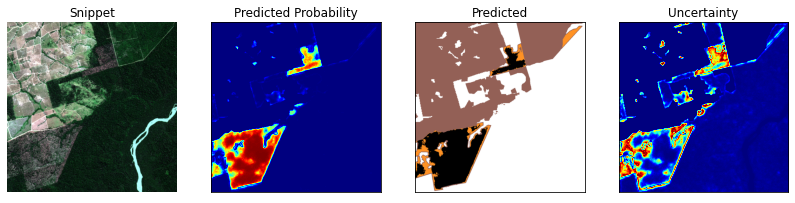

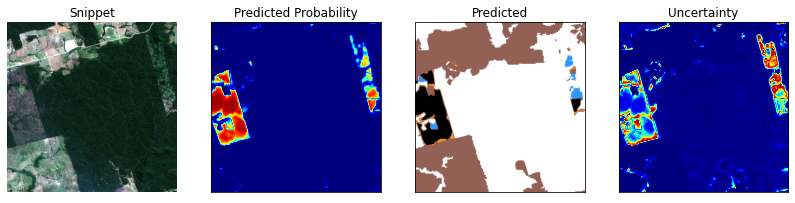

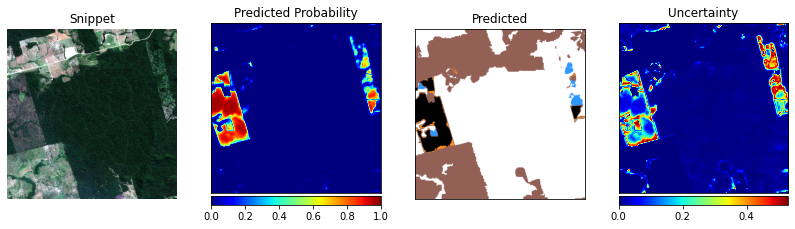

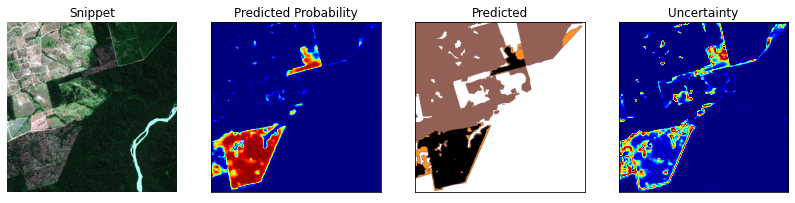

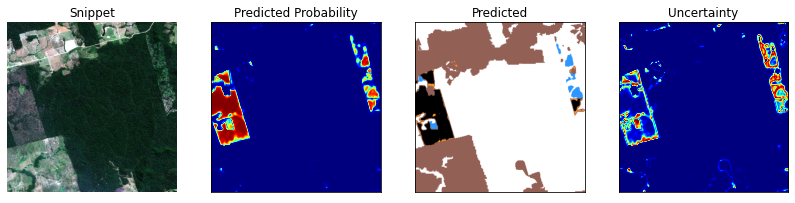

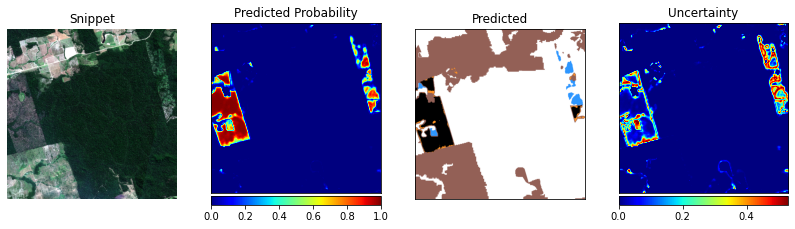

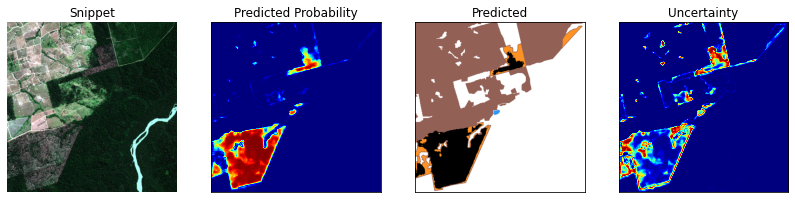

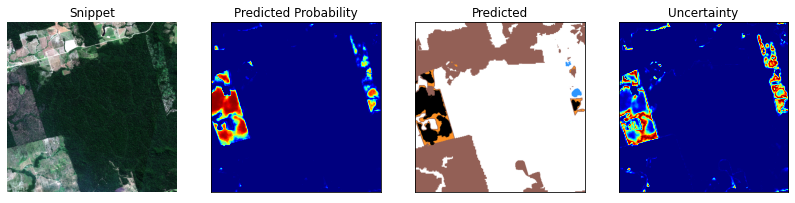

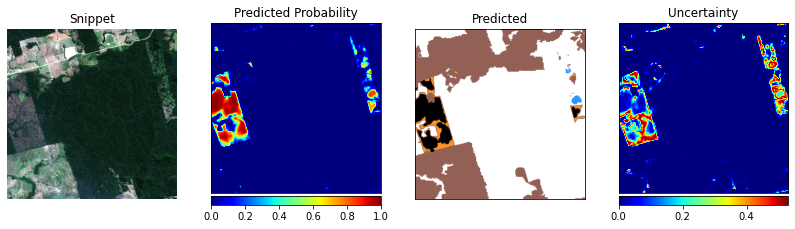

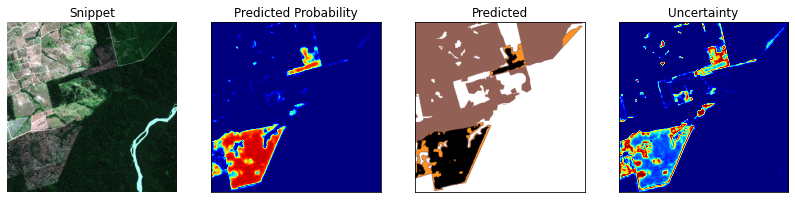

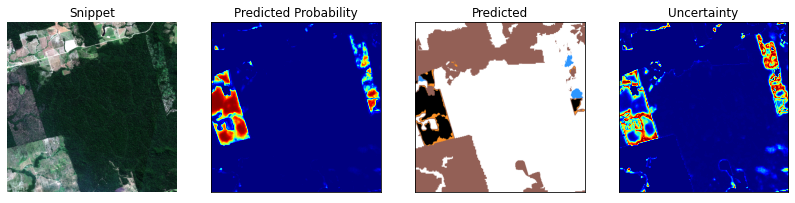

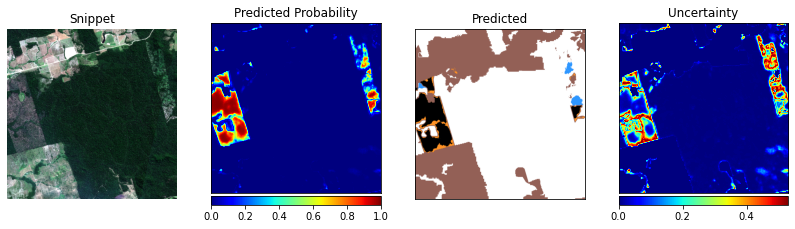

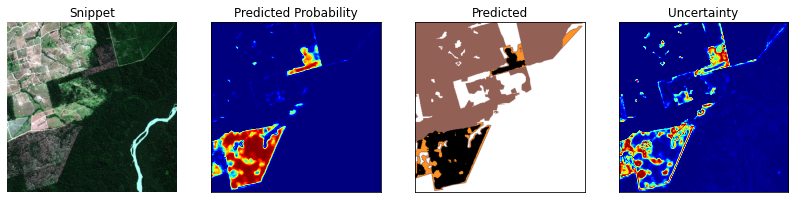

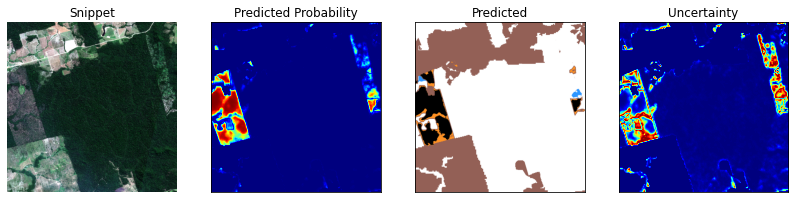

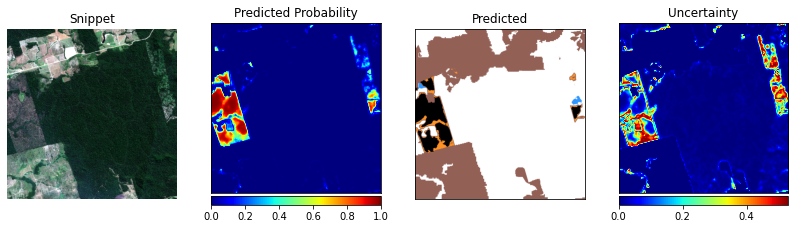

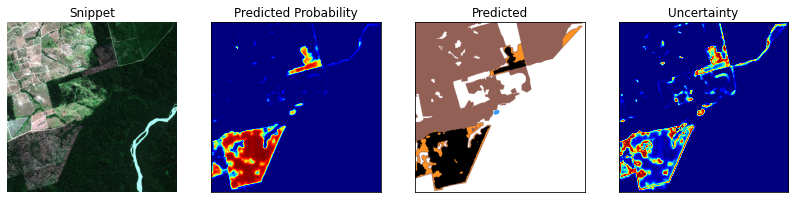

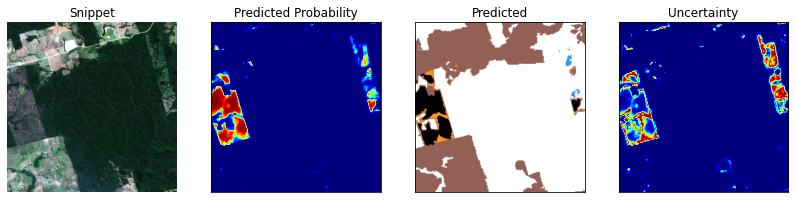

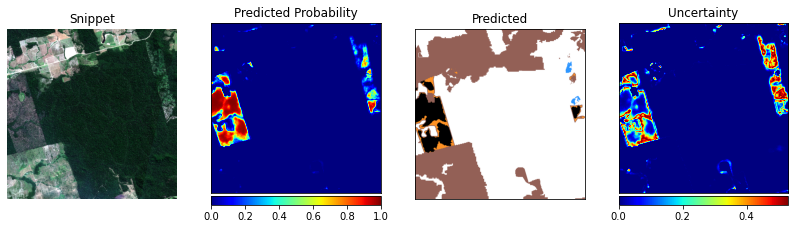

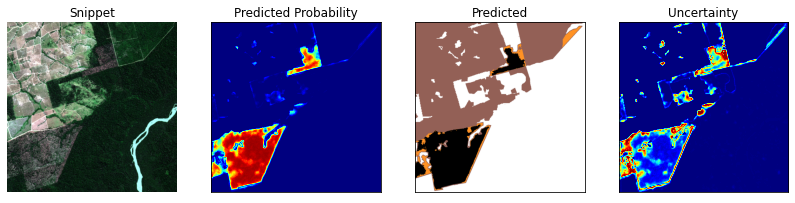

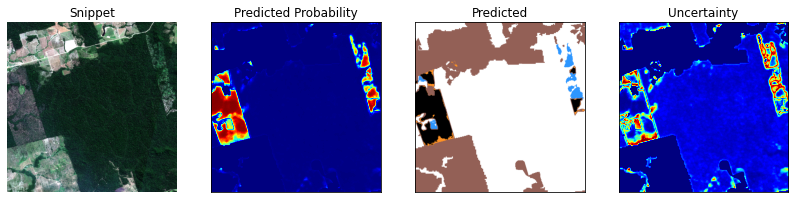

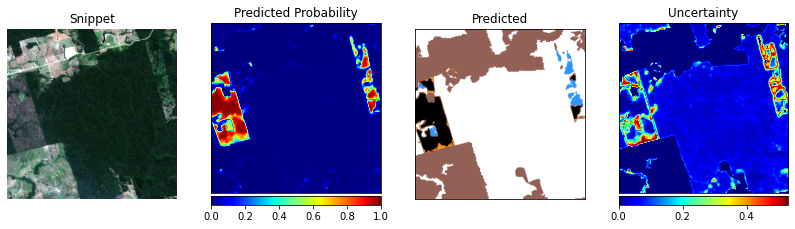

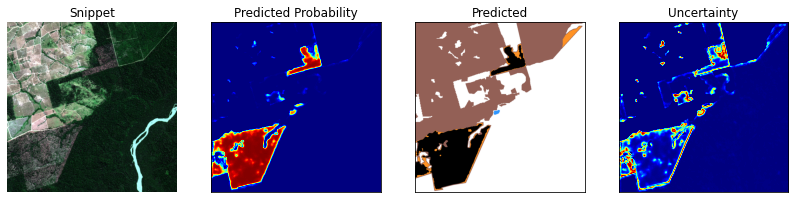

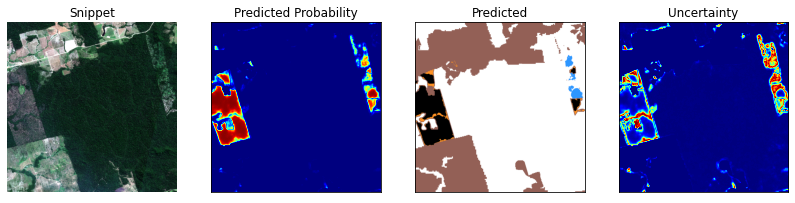

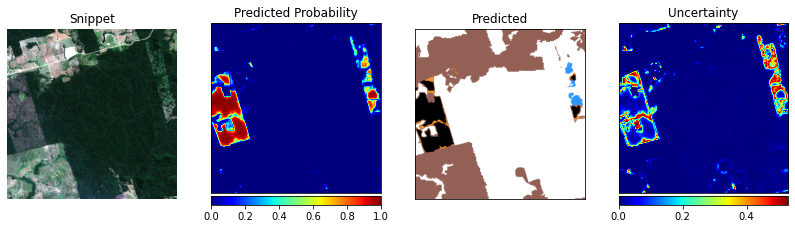

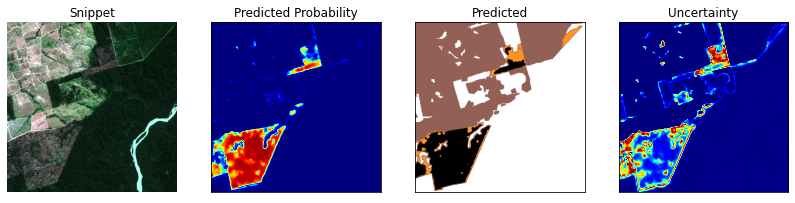

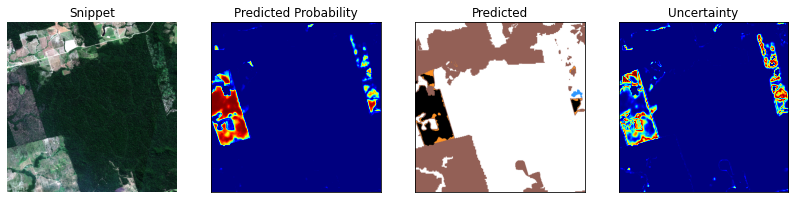

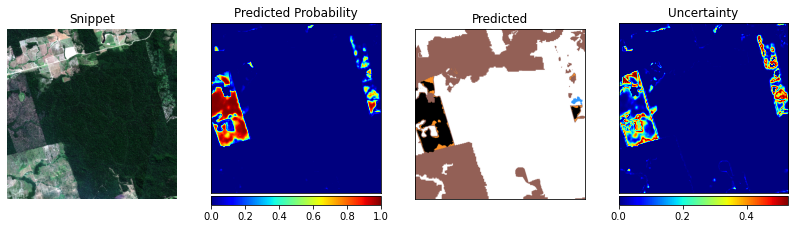

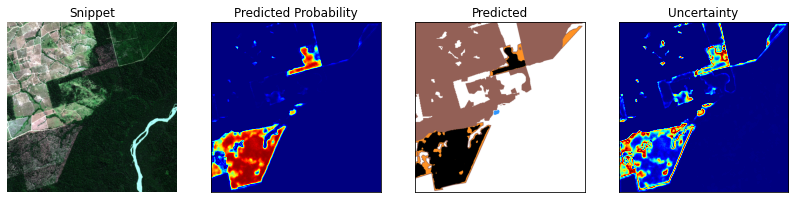

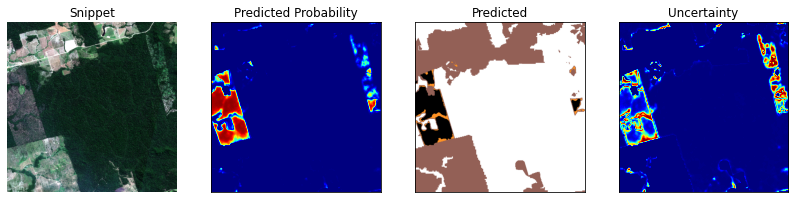

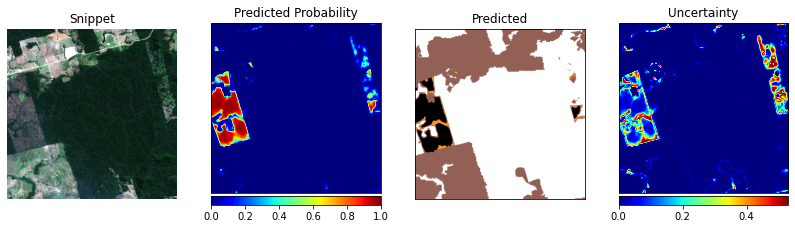

In [9]:
if inferring == True:
    idx = 0
    results = []
    error_count = 0

    while idx < len(exp_ids):
    # for experiment_value, exp_id in zip(experiment_values, exp_ids):
        try:

            print("Beginning run number {}".format(idx))
            logger = Logger()
            trainer = trainer_class(config, dataset, patchesHandler, logger)

            trainer.defineExperiment(exp_ids[idx])

            trainer.setExperimentPath()
            trainer.createLogFolders()

            trainer.loadDataset()

            # %%
            result = trainer.run_predictor()
            print("Result idx {}: {}".format(idx, result))
            results.append(result)


            with open(trainer.default_log_name, 'wb') as f:
                pickle.dump(results, f)
            print("Grid execution idx: {}".format(idx))
            idx += 1
            print("Grid execution idx: {}".format(idx))
            error_count = 0
        except Exception as e: 
            print(traceback.format_exc())
            error_count += 1
            if error_count > 10:
                sys.exit()
            print("Execution error in idx {}. Retrying...".format(idx))
            continue

In [10]:
print(results)

[{'other_uncertainty_metrics': {'sUEO': 0.6792476375987123, 'ece_score': 0.02474262809975081}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[3.1325812e-03],
       [4.3137840e-07],
       [6.3952531e-05],
       [8.5875578e-03],
       [9.5199546e-05],
       [1.0005843e-06],
       [1.0722359e-04],
       [1.1822790e-03],
       [2.4638954e-04],
       [1.3750782e-03]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.3048713 ],
       [0.03969803],
       [0.35252574],
       [0.3930571 ],
       [0.1799356 ],
       [0.2495324 ],
       [0.27107358],
       [0.2907197 ],
       [0.13493493],
       [0.39063418]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.13086891],
       [0.00229446],
       [0.1563596 ],
       [0.29842225],
       [0.02755358],
       [0.06821214],
       [0.06733136],
       [0.12779626],
       [0.0081311 ],

In [11]:
print(len(results))

10


In [12]:
results[9]

{'other_uncertainty_metrics': {'sUEO': 0.7170674745728572,
  'ece_score': 0.0110214317915386},
 'snippet_poi_results': [{'snippet_id': 0,
   'coords': [550, 550],
   'reference': 0,
   'predicted': array([[1.07774456e-08],
          [5.51542249e-11],
          [2.53494903e-07],
          [5.03244519e-06],
          [1.07008134e-04],
          [7.26066247e-08],
          [1.10856863e-03],
          [2.02127126e-06],
          [6.87894544e-06],
          [2.41340672e-06]], dtype=float32)},
  {'snippet_id': 0,
   'coords': [210, 610],
   'reference': 1,
   'predicted': array([[0.06664068],
          [0.19926089],
          [0.26611024],
          [0.08915706],
          [0.34445694],
          [0.09319803],
          [0.32028294],
          [0.23212396],
          [0.20360811],
          [0.18352062]], dtype=float32)},
  {'snippet_id': 0,
   'coords': [207, 617],
   'reference': 1,
   'predicted': array([[0.00148046],
          [0.00500746],
          [0.05256291],
          [0.01269368],

In [13]:
trainer.f1

74.4

In [14]:
print(trainer.f1)

74.4
